In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc

BuRd = rcmap(cm.RdBu)

import hickle as hkl

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary


def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise
####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

a=6371.0e3
R=a

In [3]:
# ls /project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2

In [4]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files
m90 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC0_la50m_oc50m/*.hkl'))
m55 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/*.hkl'))
m57 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/*.hkl'))
m59 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC59_la50m_oc2m/*.hkl'))




In [5]:
m57

['/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/mmc_decompose_vert_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/flux_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/coord_dic.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/div_flux_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/div_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/mmc_decompose_interp.hkl']

In [6]:
m55

['/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/EKE_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/mmc_decompose_vert_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/flux_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/coord_dic.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/div_flux_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/div_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC55_la50m_oc2m/mmc_decompose_interp.hkl']

In [7]:
m59

['/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC59_la50m_oc2m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC59_la50m_oc2m/mmc_decompose_vert_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC59_la50m_oc2m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC59_la50m_oc2m/flux_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC59_la50m_oc2m/coord_dic.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC59_la50m_oc2m/div_flux_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC59_la50m_oc2m/div_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC59_la50m_oc2m/mmc_decompose_interp.hkl']

In [8]:
m57

['/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/mmc_decompose_vert_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/flux_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/coord_dic.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/div_flux_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/div_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/am2/HC57_la50m_oc2m/mmc_decompose_interp.hkl']

In [9]:
# f=0; e=1; r=2; fv=3; c=4;d=5; dv=6; 

DEPTHS=[m90,m55,m57,m59]
depths=[90, 55,57,59]
flux=[]
div=[]
temp=[]
raw=[]
coord=load(m90[2])
for depth in DEPTHS:
    if depth==m90:
        f=0;r=1;  c=2; d=3;  
    elif depth==m55:
        f=0; e=1; r=3; fv=4; c=5;d=6; dv=7;   
    else:
        f=0; r=2; fv=3; c=4; d=5; dv=6;  
    flux.append(load(depth[f]))
    div.append(load(depth[d])) 
    raw.append(load(depth[r]))

In [10]:
import scipy.io as sio

In [11]:
d90=0;d55=1;d57=2;d59=3

In [12]:
depths=[90, 55,57,59]

In [13]:
# flux[2].keys()

In [14]:
# def save(X,name): 
#     Y={'d50_polaricecap':X[d55]}
#     sio.savemat(name, Y)
# dest= '/project2/tas1/pragallva/Summer_quarter_2018/MAT_files/'  
# save(flux,dest+"Gfdl_polar_icecap_FLUX_in_PW.mat")
# save(div, dest+"Gfdl_polar_icecap_DIV_in_W_m2.mat")
# save(raw, dest+"Gfdl_polar_icecap_RAW_data_all_levels.mat")
# sio.savemat(dest+"coordinates.mat", coord)

In [15]:
lat=div[0]['latn']
def M(X):
    #X=X-X.mean(axis=0)[None,:]
    return X
Iswabs=[]; Ishf=[]; Idhdt=[]; Iolr=[]; Ine=[];
ISW_sfc=[]; ISW_toa=[]; ILW_sfc=[]; Ishflx=[]; Ilhflx=[]; ISFC=[]; ITOA=[]
for depth in range(len(DEPTHS)):
    Iswabs.append(M(flux[depth]['SWABS']))
    Ishf.append(M(flux[depth]['SHF']))
    Idhdt.append(M(flux[depth]['dhdt']))
    Iolr.append(M(flux[depth]['olr']))
    ISW_sfc.append(-1*M(flux[depth]['SW_sfc_d'])) ## up
    ILW_sfc.append(M(-1*flux[depth]['LW_sfc_d'])) ## up
    ISW_toa.append(M(flux[depth]['SW_toa_d']))    ## dn
    Ishflx.append(M(flux[depth]['shflx_u']))      ## up
    Ilhflx.append(M(flux[depth]['lhflx_u']))      ## up
    
    ISFC.append(M(flux[depth]['SFC_u']))
    ITOA.append(M(flux[depth]['TOA_d']))
    
    Ine.append(Iswabs[depth]+Ishf[depth]-Iolr[depth]-Idhdt[depth])

In [16]:
# flux[2].keys()

In [17]:
# py.plot(Iswabs[0][:].mean(axis=1),'r-')
# py.plot(Ishf[0][:].mean(axis=1),'b-')
# py.plot(Iolr[0][:].mean(axis=1),'g-')
# py.plot(Idhdt[0][:].mean(axis=1),'k-')
# py.plot(Ine[0][:].mean(axis=1),'m-')

In [18]:
TE=[]; MM=[]; SE=[]; INE=[]
for depth in range(len(DEPTHS)):
    TE.append(M(flux[depth]['TE']))
    SE.append(M(flux[depth]['SE']))
    MM.append(M(flux[depth]['MM']))
    INE.append(TE[depth]+SE[depth]+MM[depth])

In [19]:
import scipy.integrate as integrate
def interad(x):
    l=np.deg2rad(lat[:,None])
    x=x*np.cos(l)
    #int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:])#int_x_r[:-1,:]) #int_x[::-1,:][1:,:]+
    return avg_int_r/10**15

In [20]:
div_TE=[]; div_MM=[]; div_SE=[]; div_NE=[];
swabs=[]; shf=[]; olr=[];dhdt=[];ne=[];
SW_sfc=[]; SW_toa=[]; LW_sfc=[]; shflx=[]; lhflx=[]; sfc=[]; toa=[]

for depth in range(len(DEPTHS)):
    div_TE.append(div[depth]['TE'])
    div_SE.append(div[depth]['SE'])
    div_MM.append(div[depth]['MM'])
    div_NE.append(div_TE[depth]+div_SE[depth]+div_MM[depth])
    
    swabs.append(div[depth]['SWABS'])
    shf.append(div[depth]['SHF'])
    dhdt.append(div[depth]['dhdt'])
    olr.append(div[depth]['olr'])
    ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
    SW_sfc.append(-1*div[depth]['SW_sfc_d'])
    LW_sfc.append(-1*div[depth]['LW_sfc_d'])
    SW_toa.append(div[depth]['SW_toa_d'])
    shflx.append(div[depth]['shflx_u'])
    lhflx.append(div[depth]['lhflx_u'])
    sfc.append(div[depth]['SFC_u'])
    toa.append(div[depth]['TOA_d'])
    

In [21]:
div[3].keys()

['dhdt',
 'latnr',
 'olr',
 'SW_toa_d',
 'MSE',
 'shflx_u',
 'MM_pot',
 'TE_pot',
 'lhflx_u',
 'TE',
 'SW_sfc_d',
 'LW_sfc_d',
 'SE_pot',
 'MM_sens',
 'TE_moist',
 'SE_sens',
 'SHF',
 'SE_moist',
 'SFC_u',
 'latn',
 'TOA_d',
 'MM',
 'TE_sens',
 'MM_moist',
 'SE',
 'SWABS']

In [22]:
# d=3
# py.plot(swabs[d][:].mean(axis=1)-swabs[d].mean(),'r-')
# py.plot(shf[d][:].mean(axis=1)-shf[d].mean(),'b-')
# py.plot( -(olr[d][:].mean(axis=1)-olr[d].mean()),'g-')
# py.plot(dhdt[d][:].mean(axis=1)-dhdt[d].mean(),'k-')
# py.plot(ne[d][:].mean(axis=1)-ne[d].mean(),'m-')

# Average Northern and Southern Hemispheres

In [23]:
TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE)
Iswabs=np.array(Iswabs); Ishf=np.array(Ishf); Ine=np.array(Ine); Iolr=np.array(Iolr); Idhdt=np.array(Idhdt);
ISW_sfc=np.array(ISW_sfc); ILW_sfc=np.array(ILW_sfc); ISW_toa=np.array(ISW_toa); Ishflx=np.array(Ishflx); Ilhflx=np.array(Ilhflx);

ISFC=np.array(ISFC); ITOA=np.array(ITOA)

In [24]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,:]+flux_flag*np.roll(x[:,l_S,:][:,::-1,:], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[:,:,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [25]:
TE_a   ,SE_a     , MM_a   , NE_a     ,ignore,  lat_a = N_S_avg(TE, SE, MM, NE,NE, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]

In [26]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x):
       N=100
       fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div


div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a

In [27]:
TE_a.shape

(4, 871, 13)

In [28]:
lat=div[0]['latn']

from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
      for m in range(0,13):
            l_range=((lat_a>=30) & (lat_a<=60))            
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

storm_pos=find_zero(div_TE_a)

In [29]:
div_TE_a.shape

(4, 871, 13)

In [30]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=storm_pos
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[d,m]==np.nan        
  return D

Intensity_te=inerp_at_max(TE_a,lat_a)
Intensity_se=inerp_at_max(SE_a,lat_a)
Intensity_mm=inerp_at_max(MM_a,lat_a)
Intensity_ne=inerp_at_max(NE_a,lat_a)


I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)




## Shift decompose

In [31]:
def calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=1):
    
    se=np.array(div_SE_a); te=np.array(div_TE_a); mm=np.array(div_MM_a); ne=np.array(div_NE_a)
    
    def diff(x):
        return x[:,:,1:]-x[:,:,:-1] 
    base_pos=te[...,:-1]
    
    if month_to_month==0 :
      def diff(x):
         return x[:,:,1:]-x[...,1:,None].mean(axis=2)    
      base_pos=te[...,1:,None].mean(axis=2)
        
    TE_change=base_pos+diff(te)
    NE_change=base_pos+diff(ne)
    SE_change=base_pos-diff(se)
    MM_change=base_pos-diff(mm)
    
    a = lambda x: np.append(x[:,:,-1,None],x,axis=-1)
    
    return a(SE_change), a(MM_change), a(TE_change), a(NE_change)

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=0)

In [32]:
div_NE_a.shape

(4, 871, 13)

In [33]:
def find_zero(div,lower_limit=30,specific_month=-1):
  depths=div.shape[0];
  months=div.shape[-1];
  zero_loc = np.zeros((depths,months))
  for d in range(0,depths):
      for m in range(0,months):
            l_range=((lat_a>=30) & (lat_a<=60))   
            if m==specific_month:
                l_range=((lat_a>=lower_limit) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

In [34]:
def threshold(I,value, pos1, pos2, pos3, pos4):
      for d in range(len(DEPTHS)):  
        for m in range(13):
            if (np.abs(I[d,m])<value) :
                #N[d,m]=np.nan
                pos1[d,m]=np.nan
                pos2[d,m]=np.nan
                pos3[d,m]=np.nan
                pos4[d,m]=np.nan                
      return pos1, pos2, pos3, pos4
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, 1.0, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))

In [35]:
def plot_flux(d,threshold_value) :
    
    n=d+1
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    pos=zero_div_TE
    
    if d==0:depth="no ice"
    if d==1:depth='only land'
    if d==2:depth="only ice"
    if d==3:depth="land ice"

    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def add(y):
       y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
       y1= np.roll(y[...,:-1],0,axis=-1)  
       y=np.append(y1,y1[:,0,np.newaxis],axis=-1)
       return y
    
    def a(y):
       y1 = y#np.append(y,y[0])
       return y1 
    
    v = np.arange(-12.0, 13.0, threshold_value)
    latns=lat

    py.subplot(220+n)
    b = py.contourf(range(13),lat_a,add(TE_a[d,...]), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(range(13),lat_a, add(TE_a[d,...]), v, colors='k',linewidths=1.0);
    
    py.plot(range(13), (pos[d,:]), 'ro-')
    #py.plot(range(13), (Intensity_te[d,:]*5), 'bo-')
    
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    
    py.xticks(range(13), (mticks),fontsize=15)
    py.yticks(range(-0,81,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(str(depths[d]),fontsize=30)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
    py.ylim(0,60)
#     py.savefig(fig_dest+title+'_flux.pdf')
    #print fig_dest+title+'_flux.pdf'
    #py.show()

In [36]:
# y=TE_a[d,...]
# z=np.roll(y[...,:-1],6,axis=-1)
# np.append(z,z[:,0,np.newaxis],axis=-1).shape


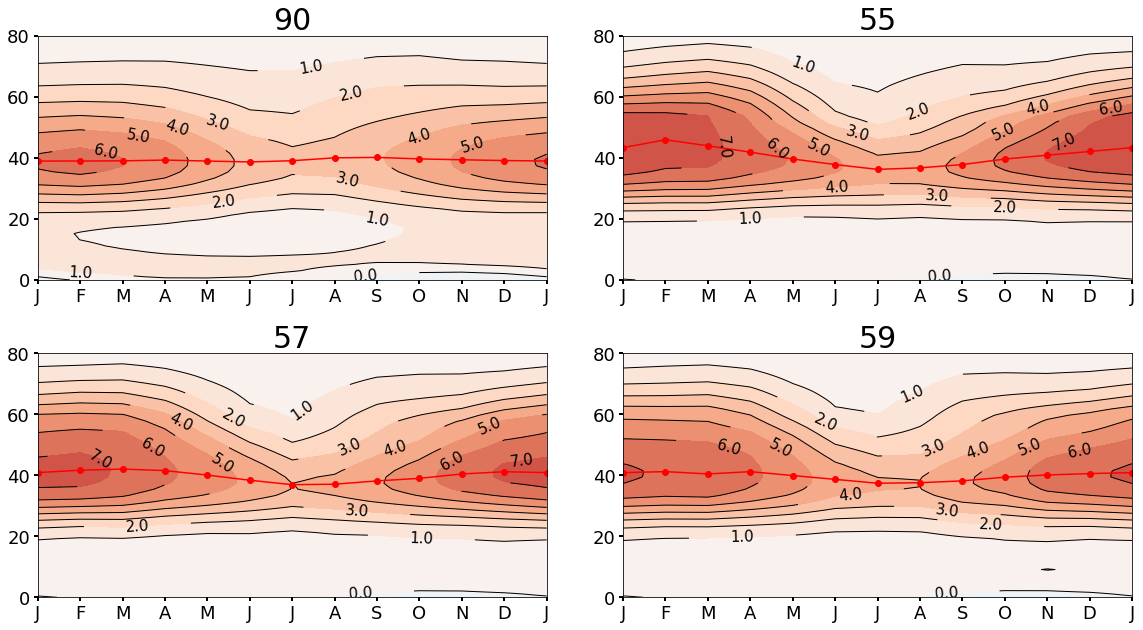

In [37]:
fig=py.figure(figsize=(20, 10))
for d in range(len(DEPTHS)):
    plot_flux(d,1.0)
    py.ylim(0,80)

In [38]:
def contf(l,y, cMAP,d,limit=300):
    v=np.linspace(-1*limit,limit,25)
    py.contourf(range(13),l,y,v,cmap=cMAP); #py.colorbar()
    c=py.contour(range(13),l,y,v,colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',colors='k',inline_spacing=5, fontsize=12)
    pos=div_TE_a[d,...]
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.tick_params(labelsize=18,size=4,width=2)



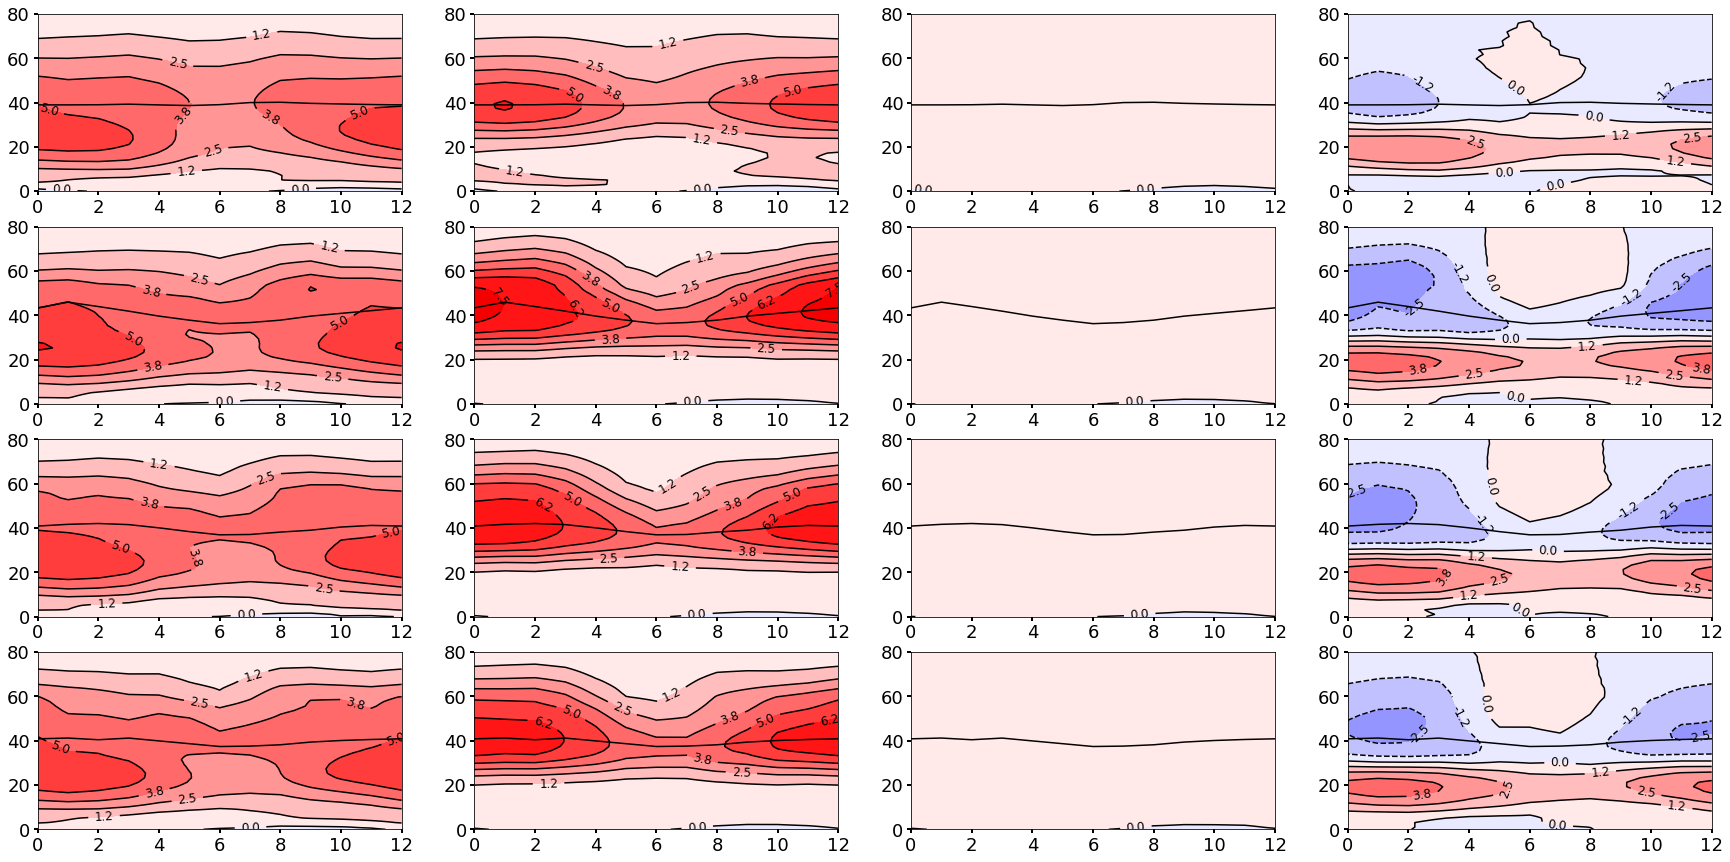

In [39]:
py.figure(figsize=(30,15))
for d in range(len(DEPTHS)):
    py.subplot(len(DEPTHS),len(DEPTHS),len(DEPTHS)*d+1)
#     if d==0:
#         py.title("NE",fontsize=20)
    contf(lat_a,NE_a[d,...], cm.seismic,d,15)
    py.subplot(4,4,4*d+2)
#     if d==1:
#         py.title("TE",fontsize=20)
    contf(lat_a,TE_a[d,...], cm.seismic,d,15)
    py.subplot(4,4,4*d+3)
#     if d==2:
#         py.title("SE",fontsize=20)
    contf(lat_a,SE_a[d,...], cm.seismic,d,15)
    py.subplot(4,4,4*d+4)
#     if d==3:
#         py.title("MM",fontsize=20)
    contf(lat_a,MM_a[d,...], cm.seismic,d,15)

In [40]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def plot_monthly_shift(d,l,month_to_month=1,threshold_value=+1) :
        
    if d==0:depth="90"
    if d==1:depth='55'
    if d==2:depth="57"
    if d==3:depth="59"
            
    I=Intensity_te
    
    n=d+1    
#     month_to_month=1
#     threshold_value=0
    SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
    if d==0:
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
    else :
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    
    if ((d==0) & (month_to_month==0)):
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))
    
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
#     fig=py.figure(figsize=(15, 9))
    
    
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    base_pos=zero_div_TE[d,:-1]
    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y
        
    if month_to_month==0:
        s=TE_change[d,:,1:].mean(axis=-1)[None,:,None]
        base_pos=find_zero(s)
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        #base_pos=44 #np.nanmean(zero_div_TE[d,:-1])
        #print base_pos
        
    TE_obs_pos         = add_month_to_end(zero_div_TE[d,1:]-base_pos)
    SE_pos             = add_month_to_end(zero_div_SE[d,1:]-base_pos)
    MM_pos             = add_month_to_end(zero_div_MM[d,1:]-base_pos)
    NE_pos             = add_month_to_end(zero_div_NE[d,1:]-base_pos)
    TE_calc_pos        = SE_pos+MM_pos+NE_pos
    nonlinear_error= TE_obs_pos-TE_calc_pos
        
#     py.subplot(220+n)
    
    py.plot(TE_obs_pos,'r.-',label=r'$\Delta\phi_{ ({obs})}$',linewidth=3.5,markersize=20)
    py.plot(SE_pos,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    py.plot(MM_pos,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    py.plot(NE_pos,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)

    title="shift decomposition"+" "+" ("+str(depth)+"m)"
    title1="shift_decomp"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    if d==0:
        py.legend(loc='best',fontsize=20,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
#     py.show()

In [44]:
# l=15.5; month_to_month=1
# fig=py.figure(figsize=(20, 10))
# for d in range(len(DEPTHS)):
#     py.subplot(2,2,d+1)
#     plot_monthly_shift(d,l,month_to_month,threshold_value)
# #     py.ylim(0,80)

# Intensity decomposition

In [45]:
### radiation

def plot_intensity(d,l,month_to_month=1):
    
    if d==0:depth="90"
    if d==1:depth='55'
    if d==2:depth="57"
    if d==3:depth="59"
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    py.subplot(2,2,d+1) 
    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=2.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)   
    py.plot(-D(Intensity_se,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=2.5)
    py.plot(-D(Intensity_mm,d),'go-',label=r'$ - \Delta I_{MM}$',lw=2.5)
     
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=18)
    title="Intensity decomposition"+" "+" ("+str(depths[d])+")"
    title1="Intensity_decomposition_"+"_"+str(depths[d])+" "
    py.title(title,fontsize=18,y=1.03)
    py.xticks(range(13), mticks,size=12)
    py.tick_params(labelsize=18,size=5,width=1)
    py.axhspan(-0.5, 0.5, facecolor='0.5', alpha=0.3)
    py.legend(loc='best',fontsize=18,ncol=2,frameon=False)
    
    #py.savefig(fig_dest+title1+'.pdf')
#     print fig_dest+title1+'.pdf'

    py.ylim(-3,3)
    py.tight_layout()

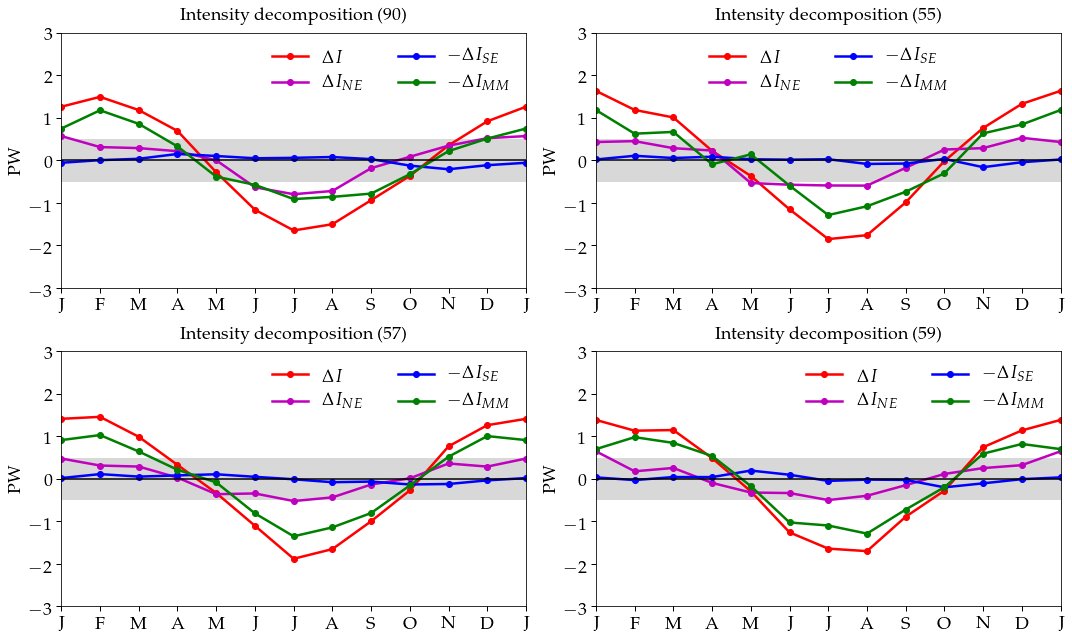

In [46]:
l=6
fig=py.figure(figsize=(15, 9)) 
#for d in range(len(DEPTHS)):
i=0
for d in range(len(DEPTHS)):
    plot_intensity(d,l,0)
#     if d==0:
#         py.title("polar ice cap",fontsize=20)
#     i=i+2

In [86]:
### radiation

def D(y,d):
    y1=np.append(y,y[:,0,np.newaxis],axis=1)
    x1=y1[d,1:]-y1[d,:-1]
    x2=np.append(x1[-1],x1)
    return x2

def plot_delta_NE(d,l,month_to_month=1):
    
    if d==0:depth="90"
    if d==1:depth='55'
    if d==2:depth="57"
    if d==3:depth="59"
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    

    def D(y,d):
        if month_to_month==1 :
            y1=y
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            #mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            #mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
            
    #fig=py.figure(figsize=(15, 9)) 
    py.plot(D(I_NE,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)
    py.plot(D(I_SWAB,d),'o-',c='#ff8a00ff',label=r'$\Delta I_{SWABS}$',lw=2.5)
    py.plot(D(I_SHF,d),'o-',c='#198fffff',label=r'$\Delta I_{SHF}$',lw=2.5)
    py.plot(D(-I_OLR,d),'o-',c='#1eb600ff',label=r'$ - \Delta I_{OLR}$',lw=2.5) 
        #py.plot(D(-I_dhdt_N,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5) 
        #py.plot(D(-I_dhdt_S,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5) 
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title=""+" "+""+str(depth)
    title1="NE_decomposition_"+"_"+str(depths[d])
    py.title(title,fontsize=30,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=22,size=5,width=1)
    py.axhspan(-0.3, 0.3, facecolor='0.5', alpha=0.3)
    #py.legend(fontsize=32,ncol=2,frameon=False, loc='best')  
    py.tight_layout()

In [87]:
# depths=np.array(["land ice 65","land ice 65","land ice 65","land ice 65"])

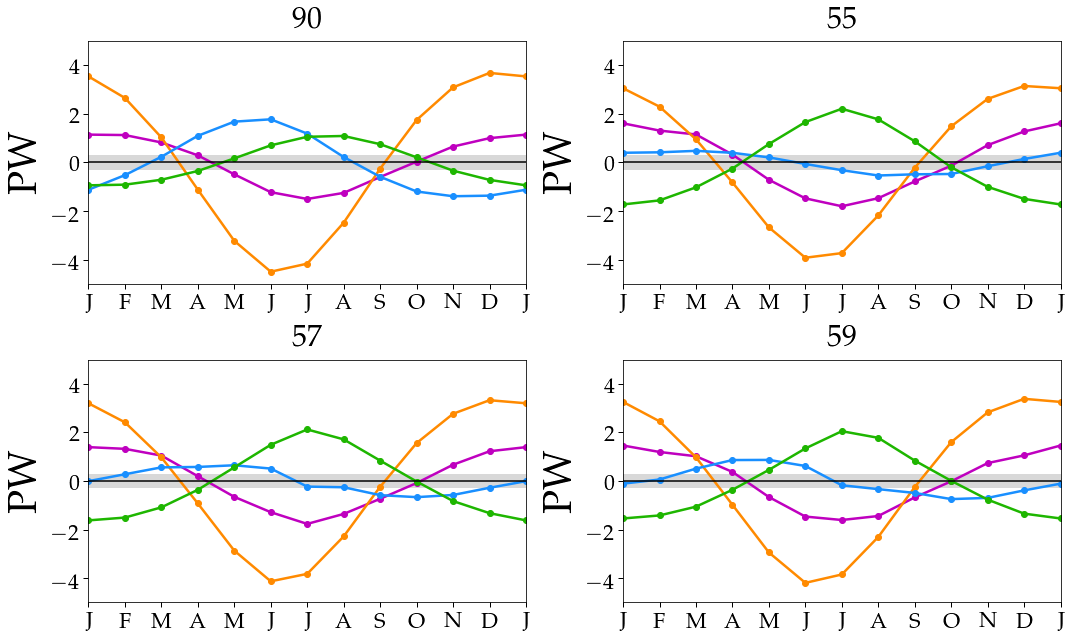

In [88]:
l=5
py.figure(figsize=(15,9))
for d in range(4):
    py.subplot(2,2,d+1)
    plot_delta_NE(d,l,0)

In [50]:
# l=6
# fig=py.figure(figsize=(15, 9)) 
# #for d in range(len(DEPTHS)):
# i=0
# for d in range(len(DEPTHS)):
#     plot_intensity(d,l,0)

1
2


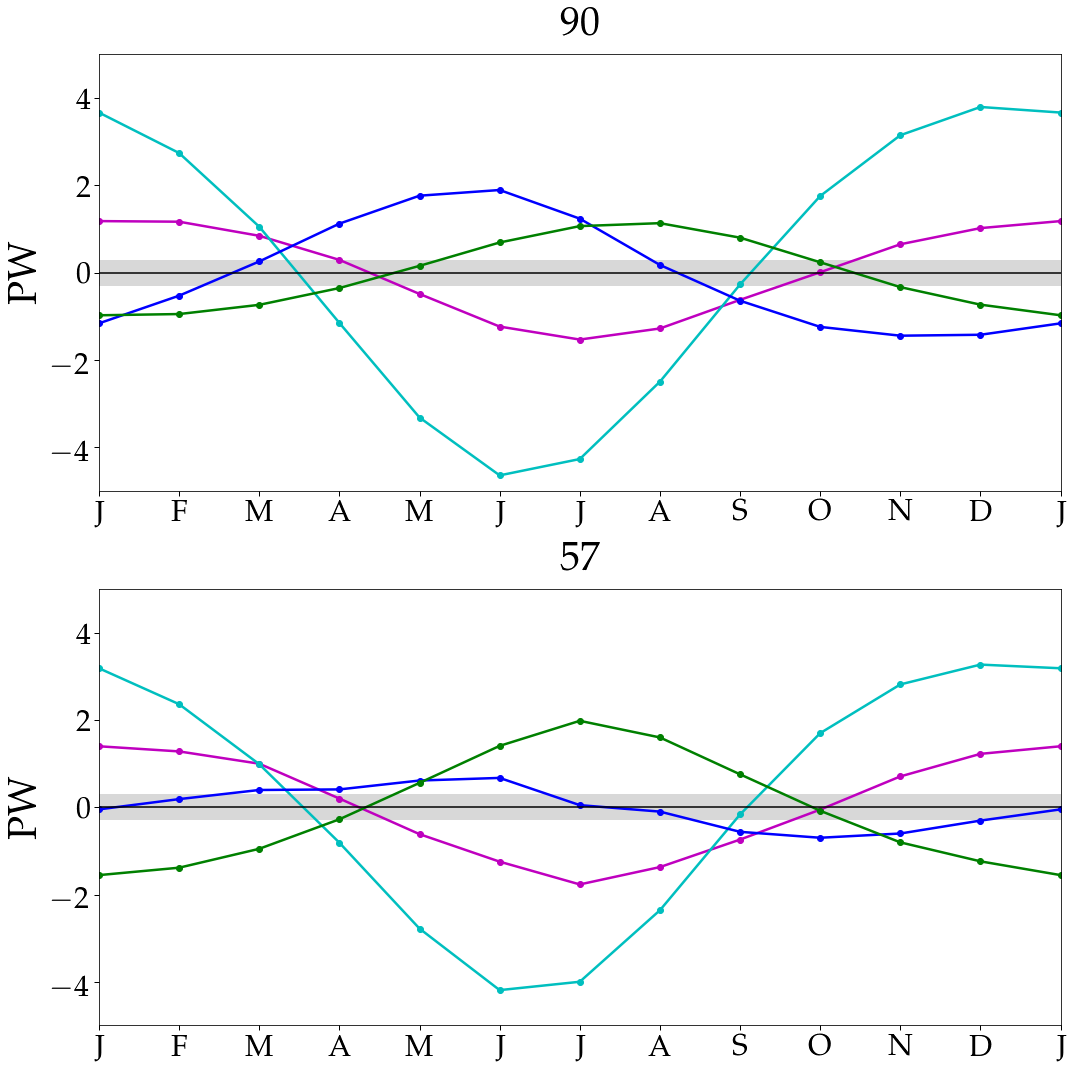

In [51]:
destination='/project2/tas1/pragallva/Fall_quarter_2018/figures/GFDL/'
make_sure_path_exists(destination)
l=7; i=0;
fig=py.figure(figsize=(15, 15))
for d in range(0,3,2):
    py.subplot(2,1,i+1)
    plot_delta_NE(d,5,0)
    i=i+1
    print i
# py.savefig(destination+"50m+polar_ice_cap.pdf")

In [52]:
# def compare_plot(n,X,c,T,cmap=cm.Reds,month_to_month=1,l=3):
#     py.subplot(220+n)
#     d=0
    
#     py.rc('text', usetex=True)
#     py.rc('font', family='serif', serif='Palatino',weight='bold')
    
#     def D(y):
#         if month_to_month==1 :
#             x1=y[1:]-y[:-1]
#             x2=np.append(x1[-1],x1)
#         else :
#             y1=y[:]-y[:-1,None].mean(axis=0)
#             x2=y1
#         return x2
    
#     if month_to_month==1 :
#         mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
#     else :
#         mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
     
#     tec = (cmap(np.linspace(0.2, 1.0, 4)))
#     py.plot(range(13),D(X[d,:]),'o-',color=tec[d],label='no ice',lw=2.5)
#     py.plot(range(13),D(X[d+1,:]),'o-',color=tec[d+1],label='only land',lw=2.5)
#     py.plot(range(13),D(X[d+2,:]),'o-',color=tec[d+2],label='only ice',lw=2.5)
#     py.plot(range(13),D(X[d+3,:]),'o-', color=tec[d+3],label='land ice',lw=2.5)
#     py.tick_params(labelsize=18,size=4,width=2)
#     py.ylabel('PW',fontsize=28)
#     py.legend(loc='best',fontsize=20)
#     py.axhline(0,color='k')
#     py.ylim(-1*l,1*l)
#     py.title(T,fontsize=30)
#     py.xticks(range(13), mticks,size=37)
#     py.tick_params(labelsize=18,size=5,width=1)
#     py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)


# # fig=py.figure(figsize=(22, 15))
# # compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$')
# # compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$')
# # compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$')
# # compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$')


In [53]:
def compare_plot(n,X,c,T,month_to_month=1,l=3):
    py.subplot(220+n)
    d=0
    
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    def D(y):
        if month_to_month==1 :
            x1=y[1:]-y[:-1]
            x2=np.append(x1[-1],x1)
        else :
            y1=y[:]-y[:-1,None].mean(axis=0)
            x2=y1
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
    py.plot(range(13),D(X[d,:]),c+'o-',label=str(depths[d]))
    py.plot(range(13),D(X[d+1,:]),c+'o--',label=str(depths[d+1]))
    py.plot(range(13),D(X[d+2,:]),c+'o-.',label=str(depths[d+2]))
#     py.plot(range(13),D(X[d+3,:]),c+'o:',label=str(depths[d+3]))
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel('PW',fontsize=28)
#     py.legend(loc='best',fontsize=20)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title(T,fontsize=30)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=18,size=5,width=1)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)


# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$')
# compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$')
# compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$')
# compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$')


In [54]:
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,Intensity_te,'r',r'$\Delta I_{TE}$',l=4)
# compare_plot(2,-Intensity_se,'b',r'$ - \Delta I_{SE}$',l=4)
# compare_plot(3,-Intensity_mm,'g',r'$ - \Delta I_{MM}$',l=4)
# compare_plot(4,Intensity_ne,'m',r'$\Delta I_{NE}$',l=4)

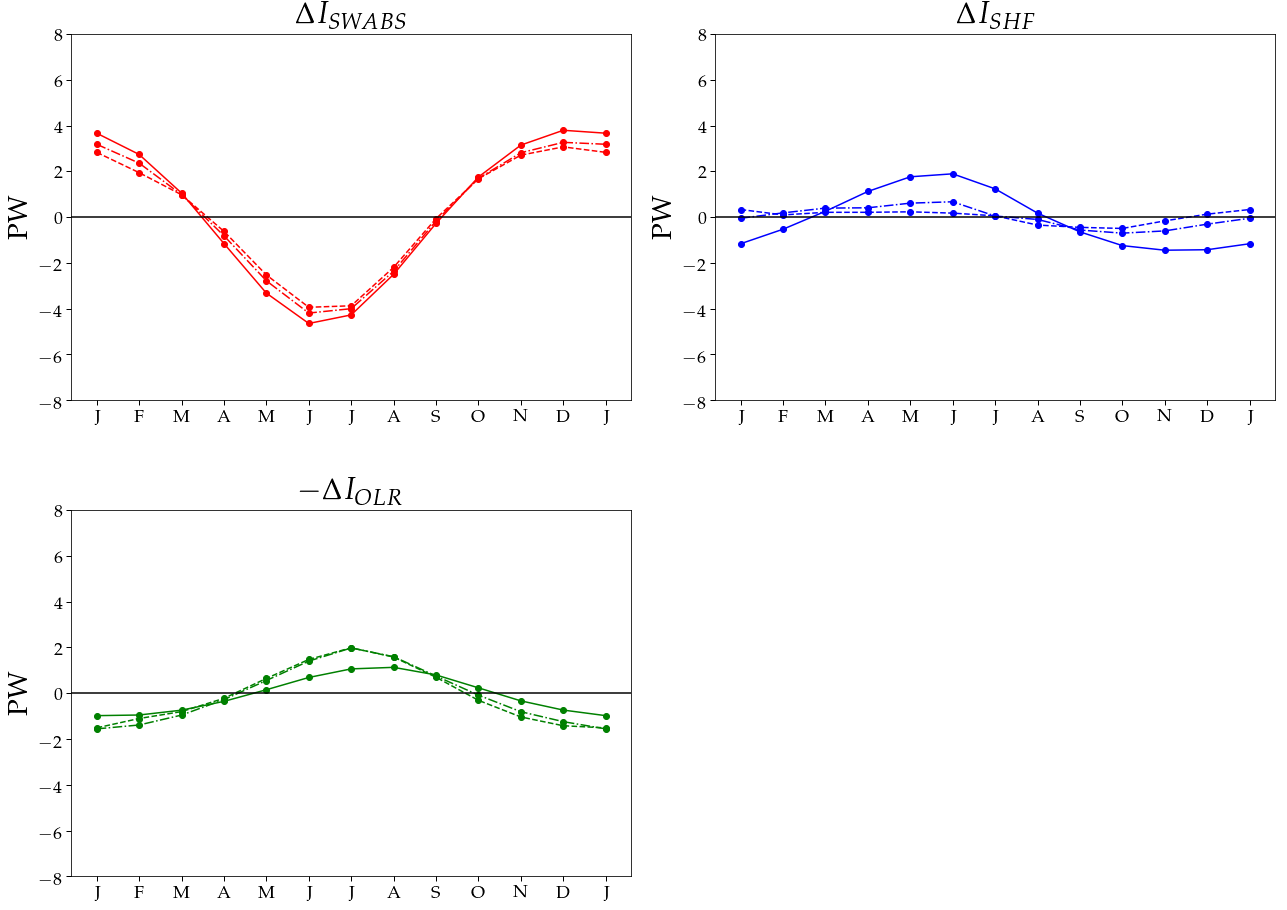

In [55]:
m_to_m=0; l=8
fig=py.figure(figsize=(22, 15))
compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$',m_to_m,l)
compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$',m_to_m,l)
compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$',m_to_m,l)
# compare_plot(4,-I_dhdt,'k',r'$\Delta I_{dhdt}$',m_to_m,l)

(-5, 5)

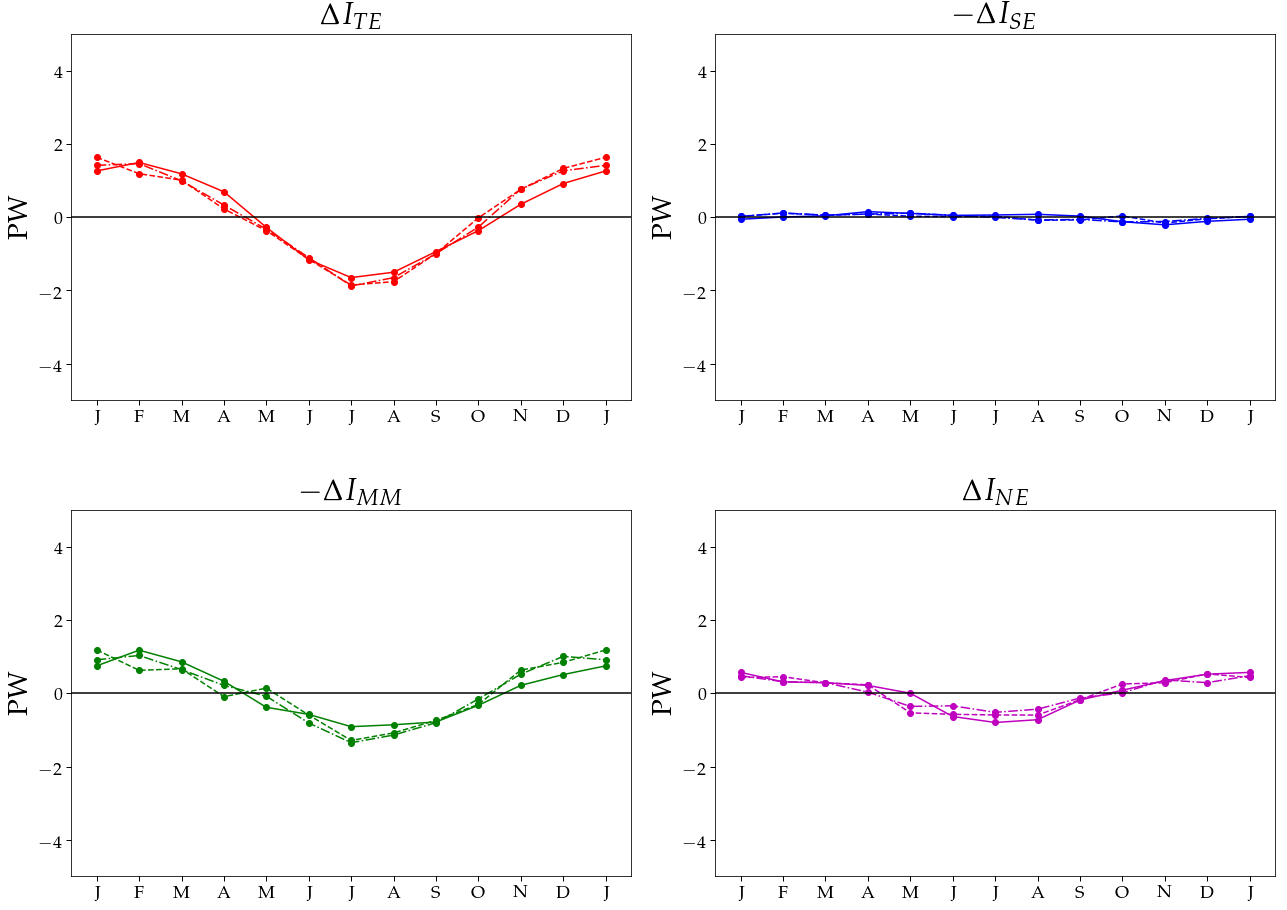

In [56]:
m_to_m=0; l=5
fig=py.figure(figsize=(22, 15))
compare_plot(1,Intensity_te,'r',r'$\Delta I_{TE}$',m_to_m,l)
py.ylim(-5,5)
compare_plot(2,-Intensity_se,'b',r'$ - \Delta I_{SE}$',m_to_m,l)
py.ylim(-5,5)
compare_plot(3,-Intensity_mm,'g',r'$ - \Delta I_{MM}$',m_to_m,l)
py.ylim(-5,5)
compare_plot(4,Intensity_ne,'m',r'$\Delta I_{NE}$',m_to_m,l)
py.ylim(-5,5)

In [57]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=40
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D


I_SWAB_at40 =inerp_at_max(Iswabs_a,latr_a)
I_SHF_at40  =inerp_at_max(Ishf_a,latr_a)
I_NE_at40   =inerp_at_max(Ine_a,latr_a)
I_OLR_at40  =inerp_at_max(Iolr_a,latr_a)
I_dhdt_at40 =inerp_at_max(Idhdt_a,latr_a)

In [58]:
# m_to_m=0; l=8
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_SWAB_at40,'r',r'$\Delta I_{SWABS}$',m_to_m,l)
# compare_plot(2,I_SHF_at40,'b',r'$\Delta I_{SHF}$',m_to_m,l)
# compare_plot(3,-I_OLR_at40,'g',r'$ - \Delta I_{OLR}$',m_to_m,l)
# compare_plot(4,I_NE_at40,'m',r'$\Delta I_{NE}$',m_to_m,l)

# Decompose Net energy in Watts/m^2

In [59]:
swabs=np.array(swabs); shf=np.array(shf); ne=np.array(ne); olr=np.array(olr); dhdt=np.array(dhdt);
SW_sfc=np.array(SW_sfc); LW_sfc=np.array(LW_sfc); SW_toa=np.array(SW_toa); shflx=np.array(shflx); lhflx=np.array(lhflx);
sfc=np.array(sfc); toa=np.array(toa); 

In [60]:
#     swabs.append(div[depth]['SWABS'])
#     shf.append(div[depth]['SHF'])
#     dhdt.append(div[depth]['dhdt'])
#     olr.append(div[depth]['olr'])
#     ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
#     SW_sfc.append(-1*div[depth]['SW_sfc_d'])
#     LW_sfc.append(-1*div[depth]['LW_sfc_d'])
#     SW_toa.append(div[depth]['SW_toa_d'])
#     shflx.append(div[depth]['shflx_u'])
#     lhflx.append(div[depth]['lhflx_u'])

In [61]:
SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]


In [62]:
def inerp_at_mean(flux,lat):
  D = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=np.nanmean(zero_div_TE[d,:-1])
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D

In [63]:
P_div_TE =inerp_at_mean(div_TE_a,lat_a)
P_div_SE =inerp_at_mean(div_SE_a,lat_a)
P_div_NE =inerp_at_mean(div_NE_a,lat_a)
P_div_MM =inerp_at_mean(div_MM_a,lat_a)

In [64]:
P_SWAB =inerp_at_max(SWABS_a,lat_a)
P_SHF  =inerp_at_max(SHF_a,lat_a)
P_NE   =inerp_at_max(NE_a,lat_a)
P_OLR  =inerp_at_max(OLR_a,lat_a)
P_dhdt =inerp_at_max(dhdt_a,lat_a)

P_SWsfc = inerp_at_max(SW_sfc_a,lat_a)
P_LWsfc = inerp_at_max(LW_sfc_a,lat_a)
P_SWtoa = inerp_at_max(SW_toa_a,lat_a)
P_shflx = inerp_at_max(shflx_a,lat_a)
P_lhflx = inerp_at_max(lhflx_a,lat_a)

P_sfc = inerp_at_max(sfc_a,lat_a)
P_toa = inerp_at_max(toa_a,lat_a)

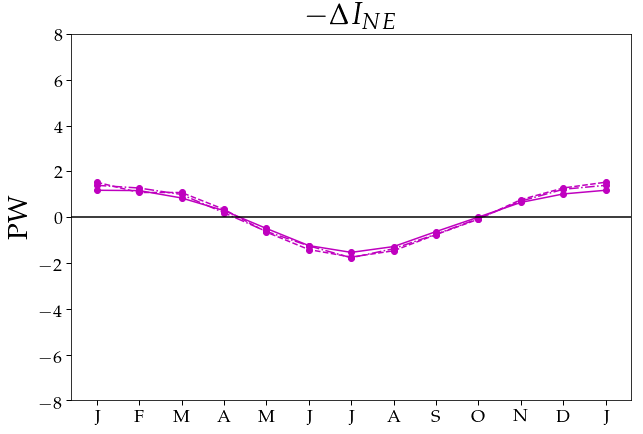

In [65]:
def D(y):
        y1=y[:]-y[:-1,None].mean(axis=0)
        x2=y1
        return x2
 
m_to_m=0; l=8
d=0; c1='k'
fig=py.figure(figsize=(22, 15))
compare_plot(1,I_NE,'m',r'$-\Delta I_{NE}$',m_to_m,l)
# py.plot(range(13),D(-I_dhdt[d,:]),c1+'o-',label='5m')
# py.plot(range(13),D(-I_dhdt[d+1,:]),c1+'o--',label='10m')
# py.plot(range(13),D(-I_dhdt[d+2,:]),c1+'o-.',label='50m')
# py.plot(range(13),D(-I_dhdt[d+3,:]),c1+'o:',label='100m')


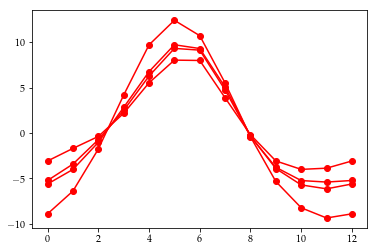

In [66]:
for d in range(len(DEPTHS)):
    py.plot(I_SFC[d,:],'ro-')
#     py.plot(I_dhdt[d,:],'ko-')
#     py.plot(I_TOA[d,:],'ro-')

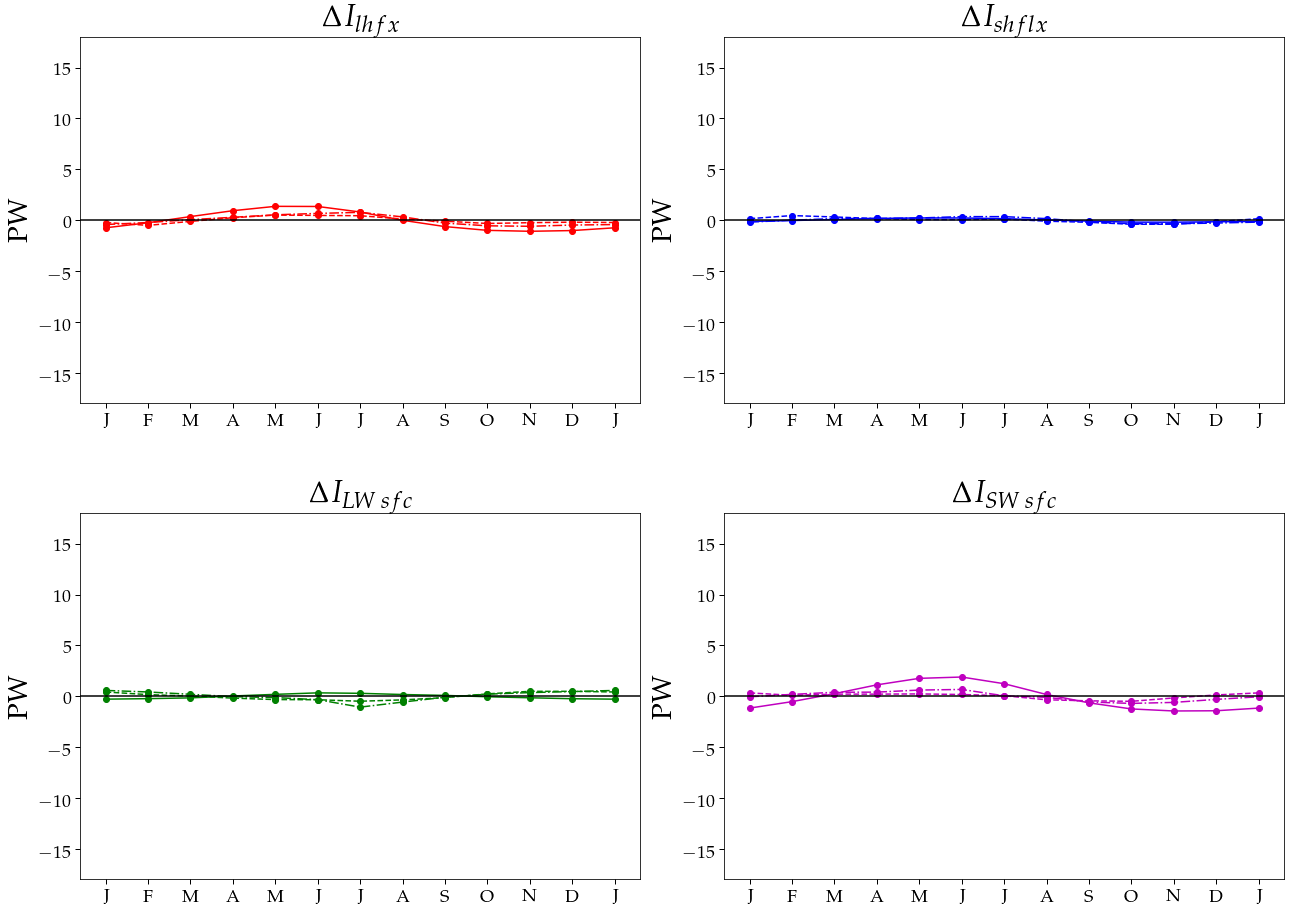

In [67]:
m_to_m=0; l=18
fig=py.figure(figsize=(22, 15))
compare_plot(1,I_lhflx,'r',r'$\Delta I_{lhfx}$',m_to_m,l)
compare_plot(2,I_shflx,'b',r'$\Delta I_{shflx}$',m_to_m,l)
compare_plot(3,I_LWsfc,'g',r'$ \Delta I_{LW\:sfc}$',m_to_m,l)
compare_plot(4,I_SHF,'m',r'$\Delta I_{SW\:sfc}$',m_to_m,l)

In [68]:
# fig=py.figure(figsize=(22, 15))
# l=6
# compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$',m_to_m,l)
# compare_plot(2,I_OLR,'g',r'$\Delta I_{SWABS}$',m_to_m,l)
# compare_plot(3,I_SWAB-I_OLR,'b',r'$\Delta I_{SWABS}$',m_to_m,l)
# compare_plot(4,I_SHF,'m',r'$\Delta I_{SWABS}$',m_to_m,l)

In [69]:
I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)

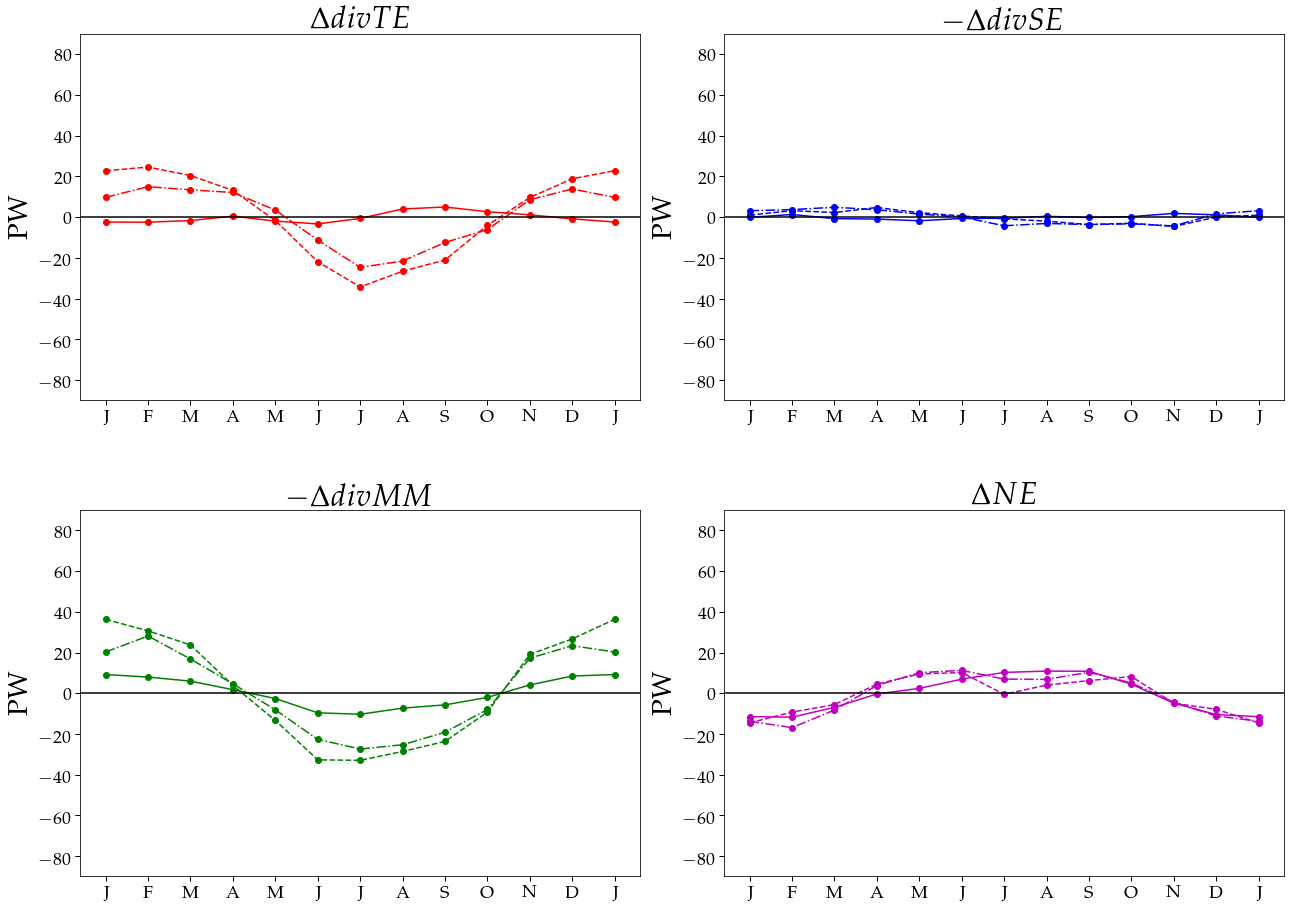

In [127]:
m_to_m=0; l=90
fig=py.figure(figsize=(22, 15))
compare_plot(1,P_div_TE,'r',r'$\Delta {divTE}$',m_to_m,l)
compare_plot(2,-P_div_SE,'b',r'$-\Delta {divSE}$',m_to_m,l)
compare_plot(3,-P_div_MM,'g',r'$-\Delta {divMM}$',m_to_m,l)
compare_plot(4,P_div_NE,'m',r'$\Delta {NE}$',m_to_m,l)

# Predict intensity

In [128]:
### radiation

def plot_intensity(d,l,month_to_month=1):
    
    if d==0: depth=5
    if d==1-1:depth=10
    if d==2-1:depth=50
    if d==3-1:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
    fig=py.figure(figsize=(15, 9))           
    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=2.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)   
    py.plot(-D(Intensity_se,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=2.5)
    py.plot(-D(Intensity_mm,d),'go-',label=r'$ - \Delta I_{MM}$',lw=2.5)
                                              
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title="Intensity decomposition"+" "+" ("+str(depth)+"m)"
    title1="Intensity_decomposition_"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.5, 0.5, facecolor='0.5', alpha=0.3)
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    #py.savefig(fig_dest+title1+'.pdf')
    print fig_dest+title1+'.pdf'

    
    py.tight_layout()

In [129]:
def predict_intensity(X,month_to_month=1):
    
    proxy=np.array(X); te=np.array(Intensity_te);
    
    def diff(x):
        return x[:,1:]-x[:,:-1] 
    base_pos=te[:,:-1]
    a = lambda x: np.append(x[:,-1,None],x,axis=-1)
    
    if month_to_month==0 :
      def diff(x):
         return x[:,1:]-x[:,1:,None].mean(axis=1) 
      a = lambda x: np.append(x[:,-1,None],x,axis=-1)
      base_pos=te[...,1:,None].mean(axis=1)
        
    TE_ch=base_pos+diff(te)
    predict=base_pos+diff(proxy)
        
    return a(TE_ch), a(predict)

orig, predict = predict_intensity(Intensity_ne-Intensity_mm-Intensity_se,month_to_month=0)

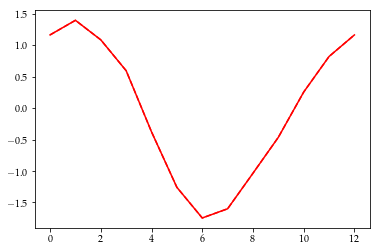

In [130]:
d=0
py.plot(orig[d,:]-orig[d,:].mean(axis=-1),'r-')
py.plot(predict[d,:]-predict[d,:].mean(axis=-1),'r--')



In [131]:
I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)

In [132]:
zero_div_TE[0,...]

array([38.93508361, 38.938633  , 39.00265808, 39.25480305, 38.92814388,
       38.64054048, 39.04075342, 39.98072163, 40.12233987, 39.63278463,
       39.34465686, 39.09731386, 38.93508361])

In [133]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def plot_monthly_shift(d,l,month_to_month=1,threshold_value=+1) :
        
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
            
    I=Intensity_te
    
    n=d+1    
#     month_to_month=1
#     threshold_value=0
    SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
    if d==0:
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
    else :
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    
    if ((d==0) & (month_to_month==0)):
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))
    
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))
    
    print zero_div_TE[0,...]
    
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    base_pos=zero_div_TE[d,:-1]
    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y
        
    if month_to_month==0:
        s=TE_change[d,:,1:].mean(axis=-1)[None,:,None]
        base_pos=find_zero(s)
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        #base_pos=44 #np.nanmean(zero_div_TE[d,:-1])
        print base_pos
        
    TE_obs_pos         = add_month_to_end(zero_div_TE[d,1:]-base_pos)
    SE_pos             = add_month_to_end(zero_div_SE[d,1:]-base_pos)
    MM_pos             = add_month_to_end(zero_div_MM[d,1:]-base_pos)
    NE_pos             = add_month_to_end(zero_div_NE[d,1:]-base_pos)
    TE_calc_pos        = SE_pos+MM_pos+NE_pos
    nonlinear_error= TE_obs_pos-TE_calc_pos
        
#     py.subplot(220+n)
    
    fig=py.plot(TE_obs_pos,'r.-',label=r'$\Delta\phi_{ ({obs})}$',linewidth=3.5,markersize=20)
    fig=py.plot(SE_pos,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(MM_pos,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(NE_pos,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)

    title="shift decomposition"+" "+" ("+str(depth)+"m)"
    title1="shift_decomp"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()
    return zero_div_TE

[38.93508361 38.938633   39.00265808 39.25480305 38.92814388 38.64054048
 39.04075342 39.98072163 40.12233987 39.63278463 39.34465686 39.09731386
 38.93508361]
[[39.61002855]]


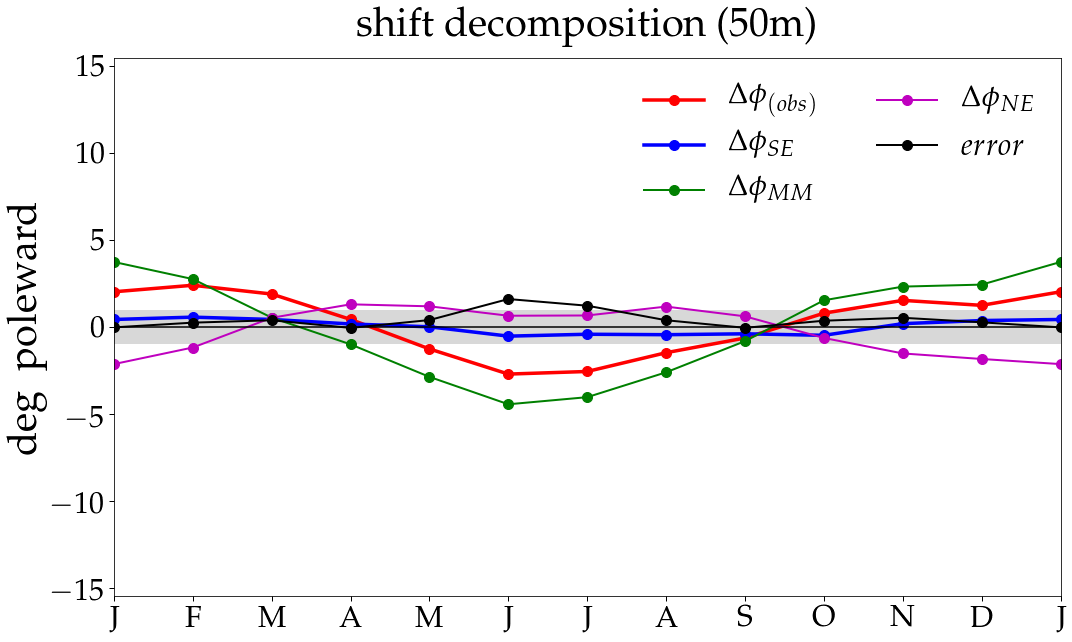

In [134]:
l=15.5
month_to_month=0; threshold_value=+0.0
storm=plot_monthly_shift(2,l,month_to_month,threshold_value)

# Observe the evolution of OLR

In [135]:
TE_a   ,SE_a     , MM_a   , NE_a     ,ignore,  lat_a = N_S_avg(TE, SE, MM, NE,NE, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]

In [136]:
SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]

In [137]:
# m10=seaice_isca_only_land
# m50=seaice_isca_only_ice
# m100=seaice_isca_land_ice
only_land=0; only_ice=1; land_ice=2
# depths=np.array(["no ice, finite LH","2m ice, 0 LH","50m ice, finite LH","2m ice, finite LH"])

In [138]:
def ann_mean(y):
    return np.squeeze( np.dstack([y.mean(axis=-1)]*13) )

In [139]:
def contf(l,y, cMAP,d,limit=300):
    py.subplot(220+d+1)
    toh = rcmap(cm.hot)
    roll=0; min=20; max=60;
#     y=y[:,1:]-y[:,:-1]
#     y=np.append(y[:,-1,None],y,axis=-1)
    #limit=np.max([np.abs(np.max(y)),np.abs(np.min(y))])
    #y=y-np.mean(y,axis=-1)[...,None]
    v=np.linspace(-1*limit,limit,50)
#     py.clf()
    py.contourf(range(13),l,y,v,cmap=cMAP); py.colorbar()
    #c=py.contour(range(13),l,y,v,colors='k')
    pos=div_TE_a[d,...]
    #py.contour(range(13),lat_a,pos,levels=[0.000],colors='k',linewidth=3.5)
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(min,max)
    #py.savefig(loc+name+'.pdf',format='pdf')


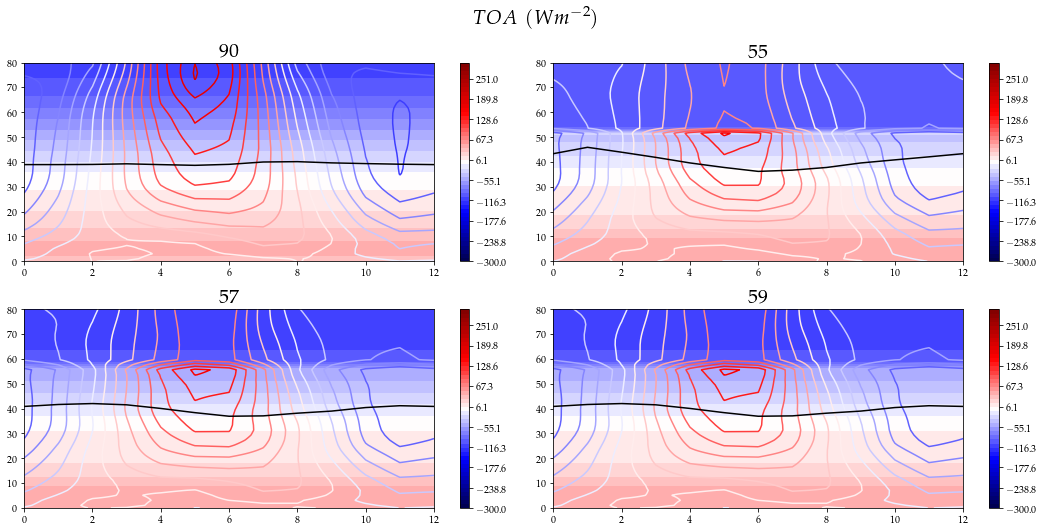

In [141]:
py.figure(figsize=(15,7))
l=300;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$TOA\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    contf(lat_a,ann_mean(toa_a)[d,...], cm.seismic,d,l)
    py.contour(range(13),lat_a,toa_a[d,...]-ann_mean(toa_a)[d,...],v,cmap=cm.seismic)    
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()
#     py.xlim(0,6)

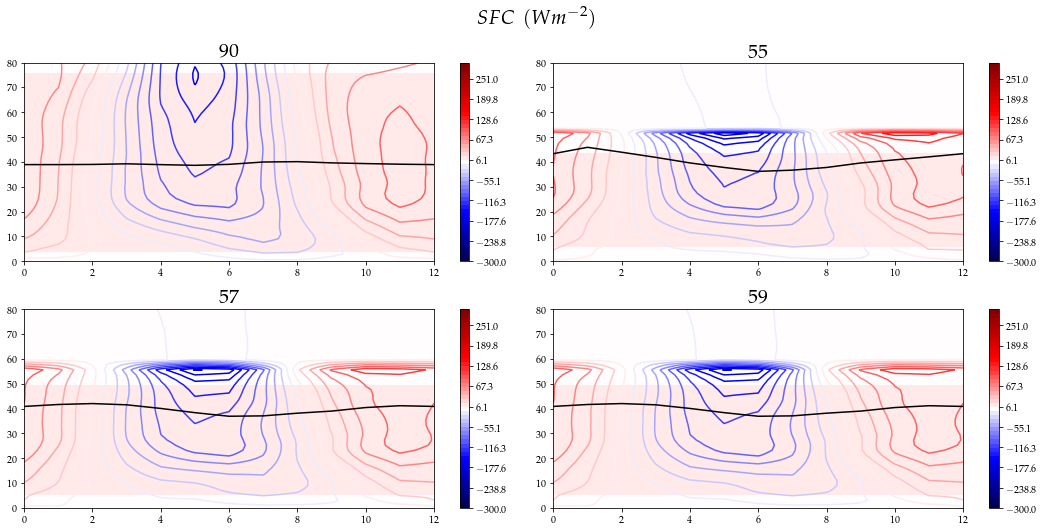

In [142]:
py.figure(figsize=(15,7))
l=300;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$SFC\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    contf(lat_a,ann_mean(sfc_a)[d,...], cm.seismic,d,l)
    py.contour(range(13),lat_a,sfc_a[d,...]-ann_mean(sfc_a)[d,...], v,cmap=cm.seismic)
    py.title(str(depths[d]),fontsize=20)
    py.ylim(0,80)
py.tight_layout()
#     py.xlim(0,6)

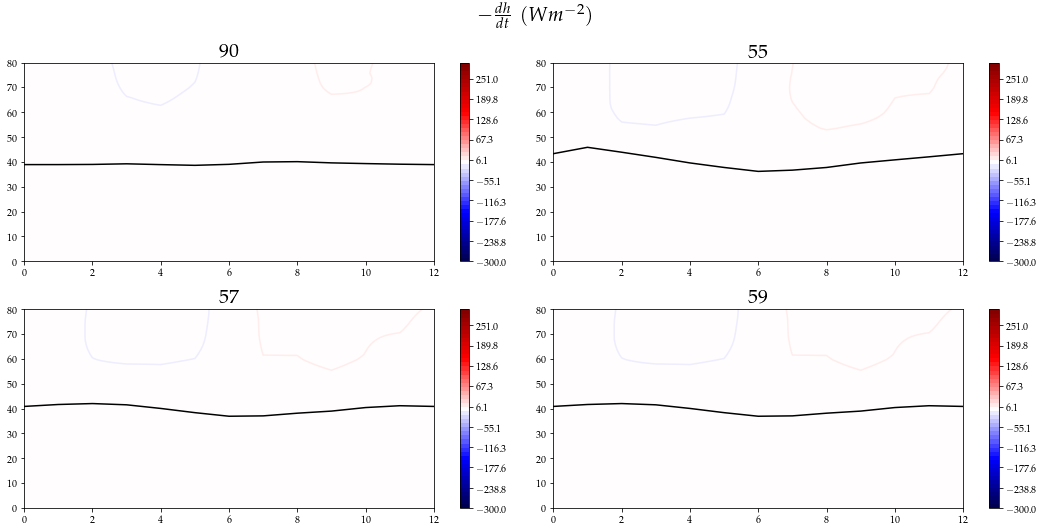

In [143]:
py.figure(figsize=(15,7))
l=300;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$-\frac{dh}{dt}\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    contf(lat_a,ann_mean(-dhdt_a)[d,...], cm.seismic,d,l)
    py.contour(range(13),lat_a,-dhdt_a[d,...]-ann_mean(-dhdt_a)[d,...], v,cmap=cm.seismic)
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()
#     py.xlim(0,6)

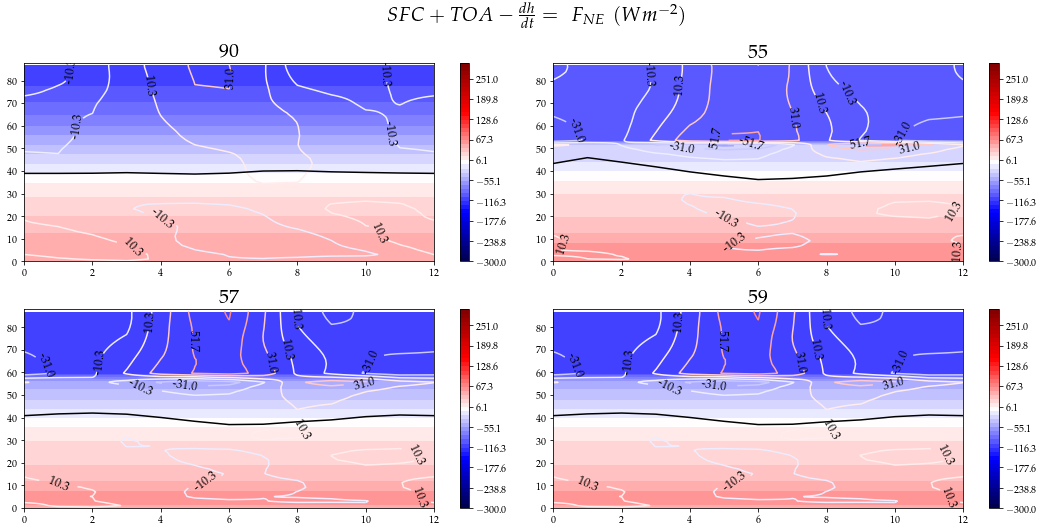

In [144]:
py.figure(figsize=(15,7))
l=300;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$SFC+TOA-\frac{dh}{dt}=\:\:F_{NE}\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    contf(lat_a,ann_mean(toa_a+sfc_a-dhdt_a)[d,...], cm.seismic,d,l)
    c=py.contour(range(13),lat_a,(toa_a+sfc_a-dhdt_a)[d,...]-ann_mean(toa_a+sfc_a-dhdt_a)[d,...], v,cmap=cm.seismic)
    py.clabel(c,  inline=1,fmt = '%1.1f',colors='k',inline_spacing=5, fontsize=12)  
    py.title(str(depths[d]),fontsize=20)
    py.ylim(0,88)
py.tight_layout()
#     py.xlim(0,6)

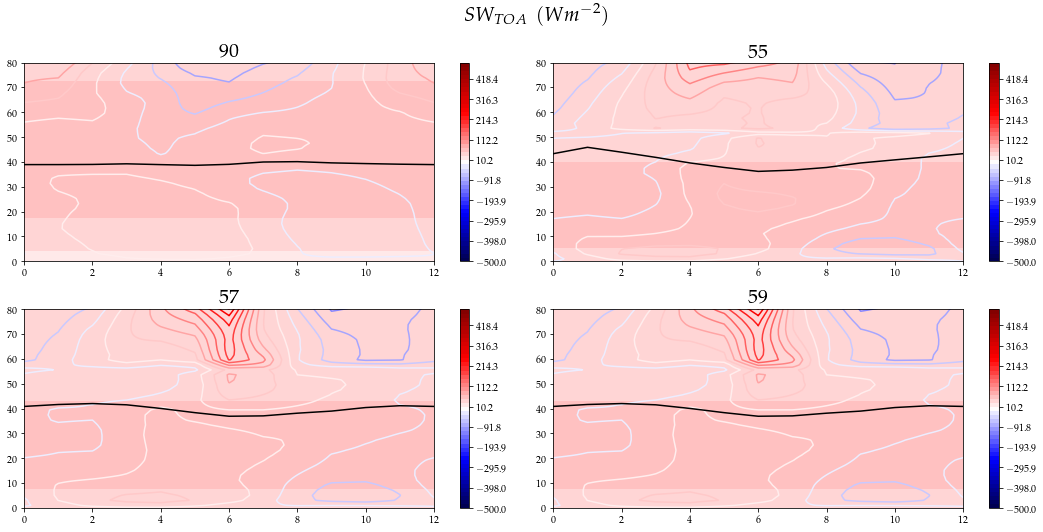

In [146]:
y=LW_sfc_a
py.figure(figsize=(15,7))
l=50;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$SW_{TOA}\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    contf(lat_a,ann_mean(y)[d,...], cm.seismic,d,l*10)
    py.contour(range(13),lat_a,(y)[d,...]-ann_mean(y)[d,...], v,cmap=cm.seismic)
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()
#     py.xlim(0,6)

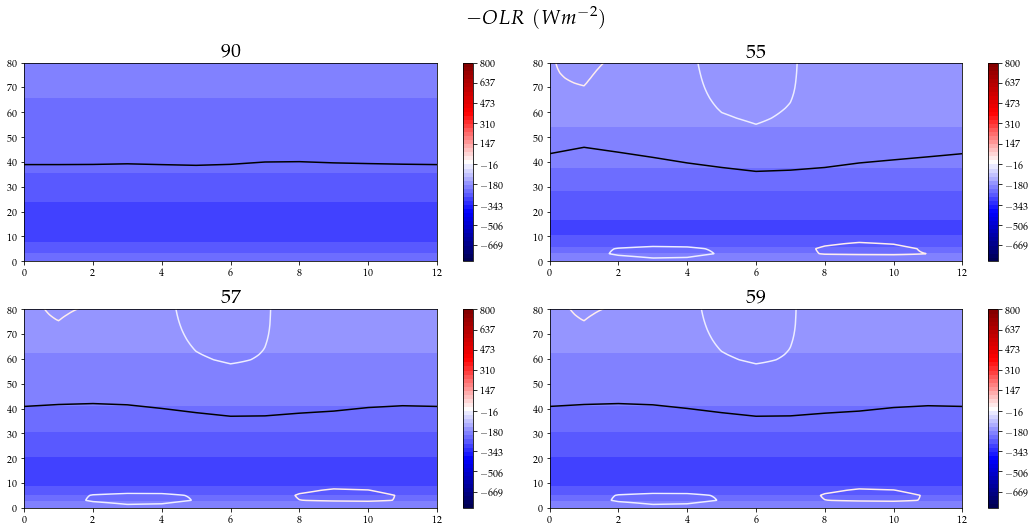

In [147]:
py.figure(figsize=(15,7))
l=800;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$-OLR\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.contour(range(13),lat_a,(-OLR_a)[d,...]-ann_mean(-OLR_a)[d,...], v,cmap=cm.seismic)
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

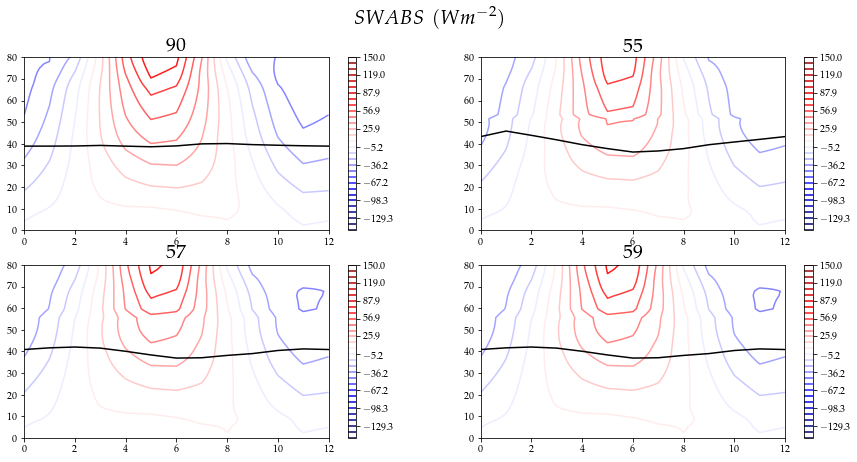

In [148]:
py.figure(figsize=(15,7))
l=150;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$SWABS\:\: (Wm^{-2})$",fontsize=20)
    #contf(lat_a,ann_mean(SWABS_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contour(range(13),lat_a,(SWABS_a)[d,...]-ann_mean(SWABS_a)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)

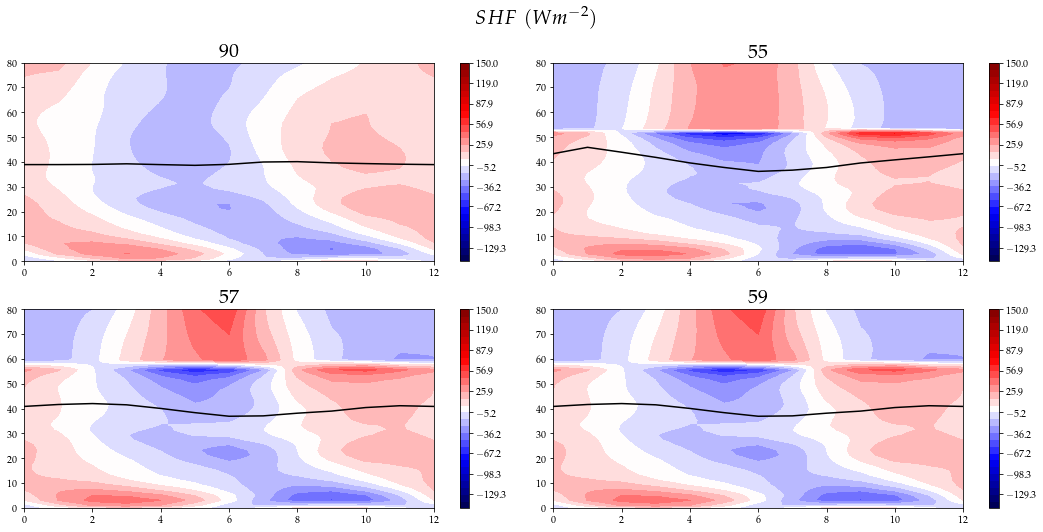

In [149]:
py.figure(figsize=(15,7))
l=150;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$SHF\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(SWABS_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contourf(range(13),lat_a,(SHF_a)[d,...]-ann_mean(SHF_a)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

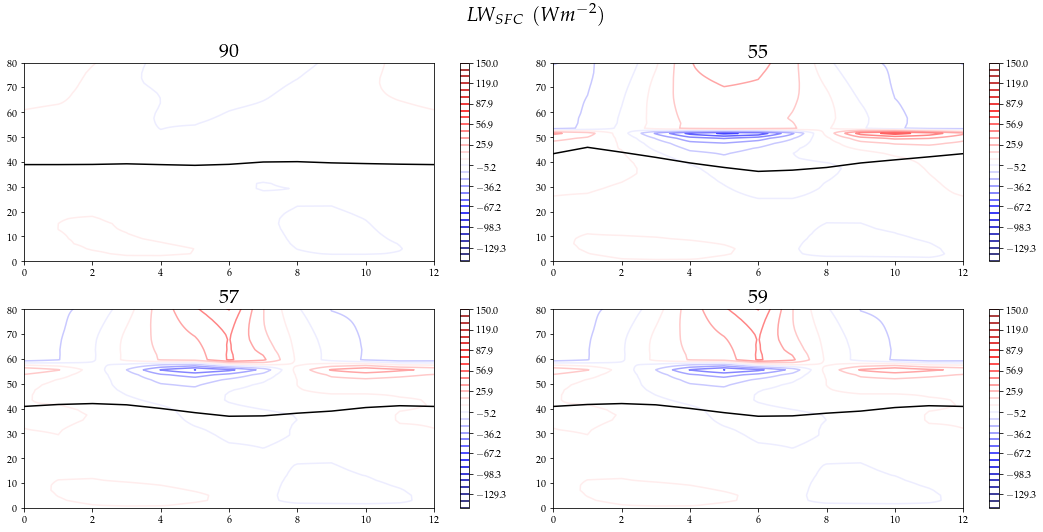

In [150]:
py.figure(figsize=(15,7))
l=150;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$LW_{SFC}\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(SWABS_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contour(range(13),lat_a,(LW_sfc_a+shflx_a)[d,...]-ann_mean(LW_sfc_a+shflx_a)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

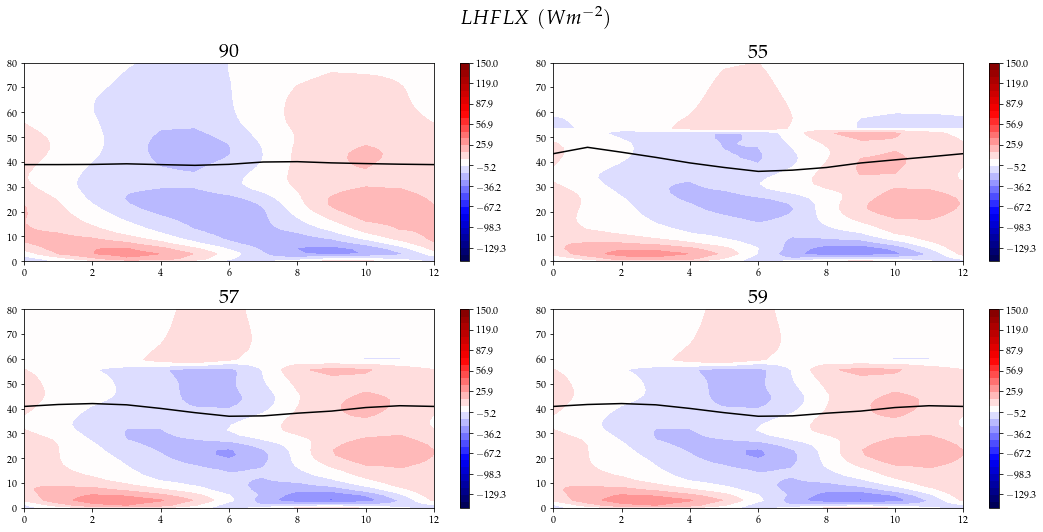

In [151]:
py.figure(figsize=(15,7))
l=150;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.subplot(2,2,d+1)
    py.suptitle(r"$LHFLX\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(SWABS_a)[d,...], cm.seismic,d,l)
#     py.contourf(range(13),lat_a,ann_mean(lhflx_a)[d,...], v,cmap=cm.seismic);
    py.contourf(range(13),lat_a,(lhflx_a)[d,...]-ann_mean(lhflx_a)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

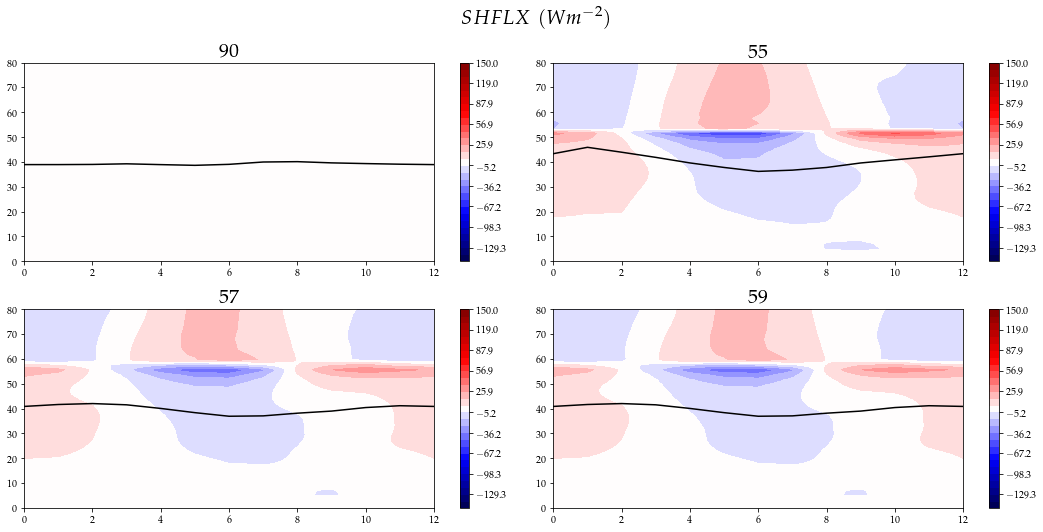

In [152]:
py.figure(figsize=(15,7))
l=150;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$SHFLX\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(SWABS_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contourf(range(13),lat_a,(shflx_a)[d,...]-ann_mean(shflx_a)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

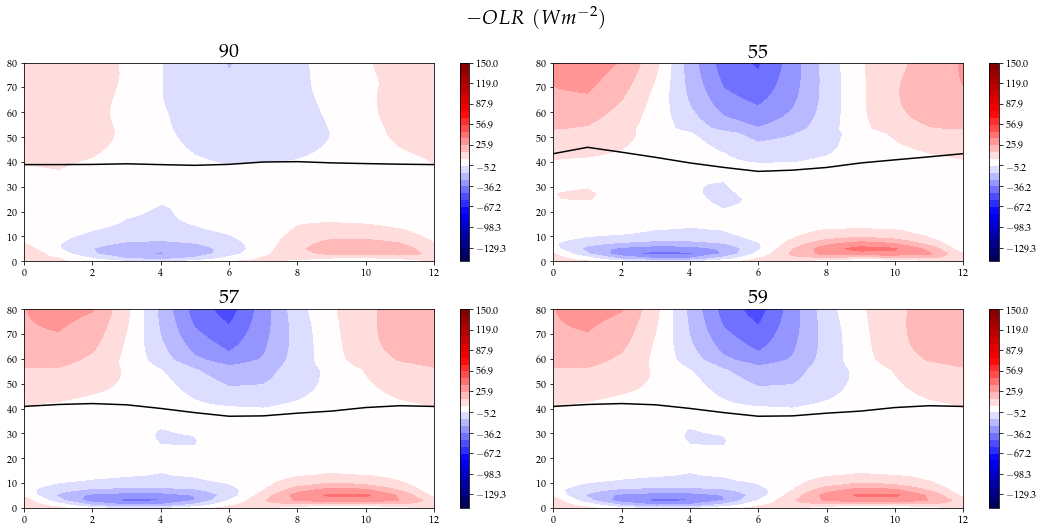

In [153]:
py.figure(figsize=(15,7))
l=150;
v=np.linspace(-1*l,l,30)
for d in range(len(DEPTHS)):
    py.suptitle(r"$-OLR\:\: (Wm^{-2})$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contourf(range(13),lat_a,(-OLR_a)[d,...]-ann_mean(-OLR_a)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

In [154]:
P_SWAB =inerp_at_max(SWABS_a,lat_a)
P_SHF  =inerp_at_max(SHF_a,lat_a)
P_NE   =inerp_at_max(NE_a,lat_a)
P_OLR  =inerp_at_max(OLR_a,lat_a)
P_dhdt =inerp_at_max(dhdt_a,lat_a)

P_SWsfc = inerp_at_max(SW_sfc_a,lat_a)
P_LWsfc = inerp_at_max(LW_sfc_a,lat_a)
P_SWtoa = inerp_at_max(SW_toa_a,lat_a)
P_shflx = inerp_at_max(shflx_a,lat_a)
P_lhflx = inerp_at_max(lhflx_a,lat_a)

P_sfc = inerp_at_max(sfc_a,lat_a)
P_toa = inerp_at_max(toa_a,lat_a)

In [155]:
I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)

In [156]:
ann_mean(I_SHF).shape

(4, 13)

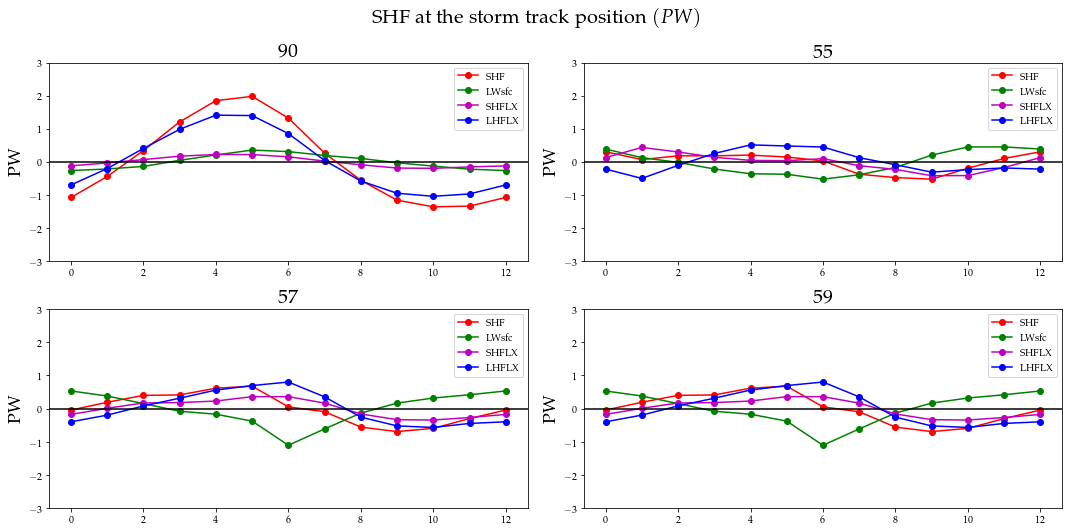

In [157]:
py.figure(figsize=(15,7))
for d in range(4):
    py.subplot(2,2,d+1)
    py.suptitle("SHF at the storm track position $(PW)$",fontsize=20,y=1.05)
    py.plot(range(13),(I_SHF-ann_mean(I_SHF))[d,:],'ro-',label='SHF')
    py.plot(range(13),(I_LWsfc-ann_mean(I_LWsfc))[d,:],'go-',label='LWsfc')
    py.plot(range(13),(I_shflx-ann_mean(I_shflx))[d,:],'mo-',label='SHFLX')
    py.plot(range(13),(I_lhflx-ann_mean(I_lhflx))[d,:],'bo-',label='LHFLX')
    py.legend()
    py.ylim(-3,3)
    py.axhline(0,color='k')
    py.ylabel(r'PW',fontsize=18)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

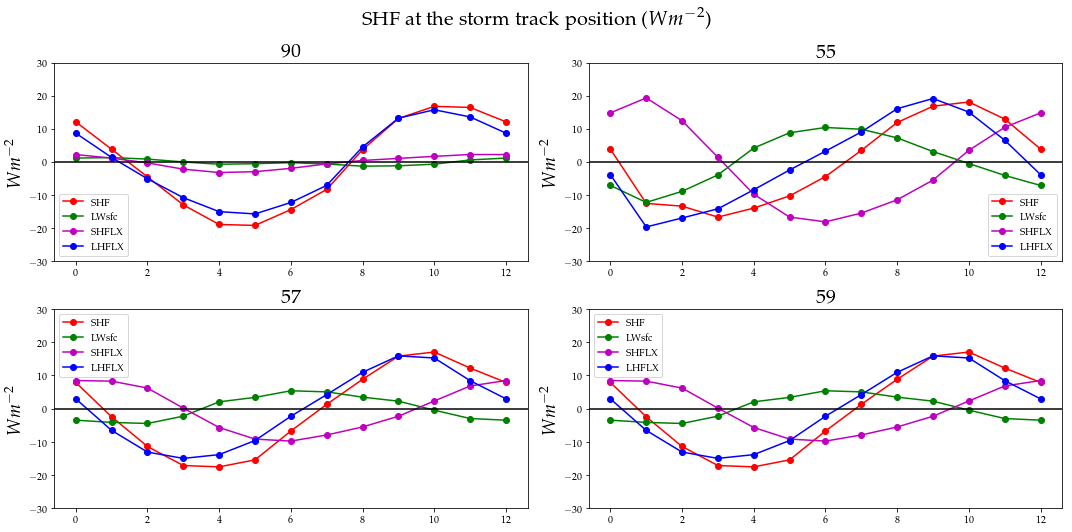

In [158]:
py.figure(figsize=(15,7))
for d in range(4):
    py.subplot(2,2,d+1)
    py.suptitle("SHF at the storm track position ($Wm^{-2}$)",fontsize=20,y=1.05)
    py.plot(range(13),(P_SHF-ann_mean(P_SHF))[d,:],'ro-',label='SHF')
    py.plot(range(13),(P_LWsfc-ann_mean(P_LWsfc))[d,:],'go-',label='LWsfc')
    py.plot(range(13),(P_shflx-ann_mean(P_shflx))[d,:],'mo-',label='SHFLX')
    py.plot(range(13),(P_lhflx-ann_mean(P_lhflx))[d,:],'bo-',label='LHFLX')
    py.title(str(depths[d]),fontsize=20)
    py.legend()
    py.ylim(-30,30)
    py.axhline(0,color='k')
    py.ylabel(r'$Wm^{-2}$',fontsize=18)
py.tight_layout()

(-5, 5)

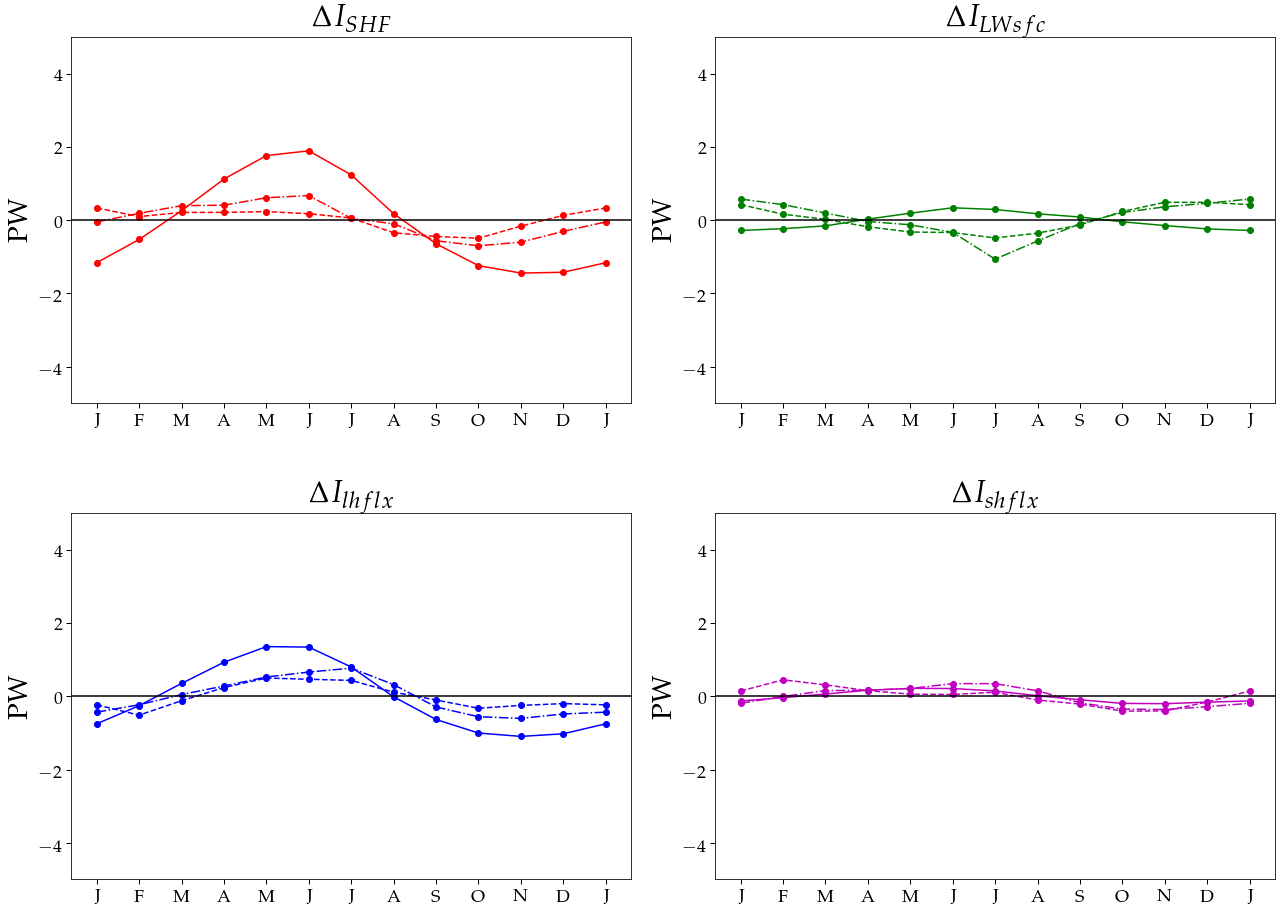

In [159]:
m_to_m=0; l=3
fig=py.figure(figsize=(22, 15))
compare_plot(1,I_SHF,'r',r'$\Delta I_{SHF}$',m_to_m,l)
py.ylim(-5,5)
compare_plot(2,I_LWsfc,'g',r'$\Delta I_{LWsfc}$',m_to_m,l)
py.ylim(-5,5)
compare_plot(3,I_lhflx,'b',r'$ \Delta I_{lhflx}$',m_to_m,l)
py.ylim(-5,5)
compare_plot(4,I_shflx,'m',r'$\Delta I_{shflx}$',m_to_m,l)
py.ylim(-5,5)


In [163]:
### radiation

def plot_dekho_dekho(d,l,month_to_month=1):
    
    if d==0:depth='SH'
    if d==1:depth='land ice 65'
    if d==2:depth='land ice 65'
    if d==3:depth='land ice 65'
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    py.subplot(2,2,d+1) 
    py.plot(D(Intensity_te,d),'ko-',label=r'$\Delta I$',lw=2.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)   
    #py.plot(D(I_SHF, d),'bo-',label=r'$  \Delta I_{SHF}$',lw=2.5)
    py.plot(-D(I_OLR,d),'go-',label=r'$ - \Delta I_{OLR}$',lw=2.5)
    py.plot(D(I_SWAB+I_SHF,d),'ro-',label=r'$  \Delta I_{SWABS}$',lw=2.5)

     
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=18)
    title="Intensity decomposition"+" "+" ("+str(depths[d])+")"
    title1="Intensity_decomposition_"+"_"+str(depths[d])+" "
    py.title(title,fontsize=18,y=1.03)
    py.xticks(range(13), mticks,size=12)
    py.tick_params(labelsize=18,size=5,width=1)
    py.axhspan(-0.5, 0.5, facecolor='0.5', alpha=0.3)
    py.legend(loc='best',fontsize=18,ncol=2,frameon=False)
    
    #py.savefig(fig_dest+title1+'.pdf')
#     print fig_dest+title1+'.pdf'

    
    py.tight_layout()

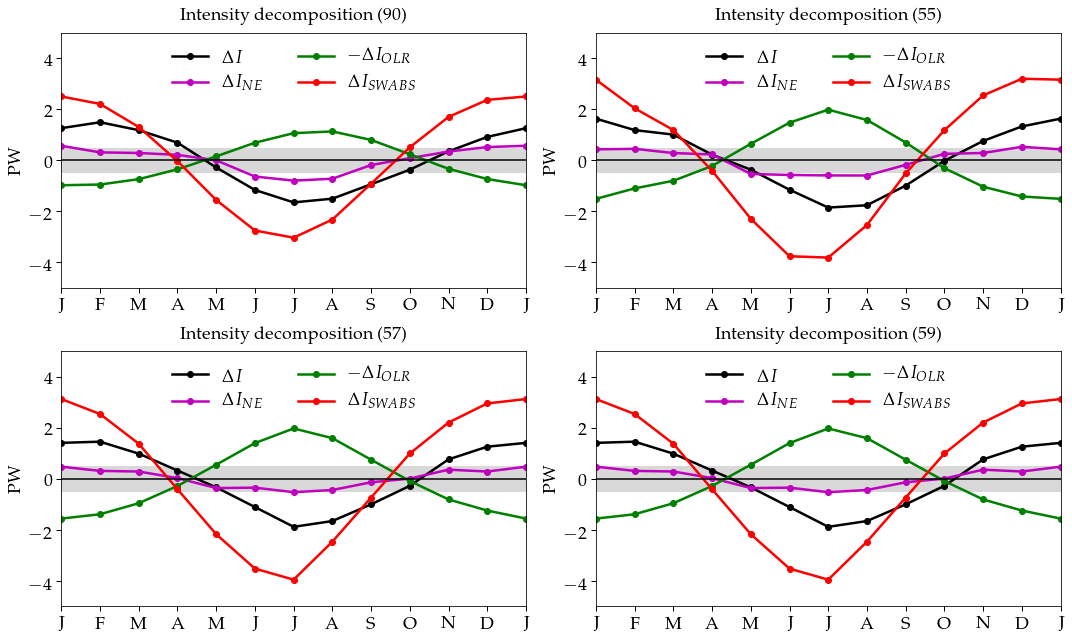

In [164]:
py.figure(figsize=(15,9))
for d in range(4):
    py.subplot(2,2,d+1)
    plot_dekho_dekho(d,5,0)

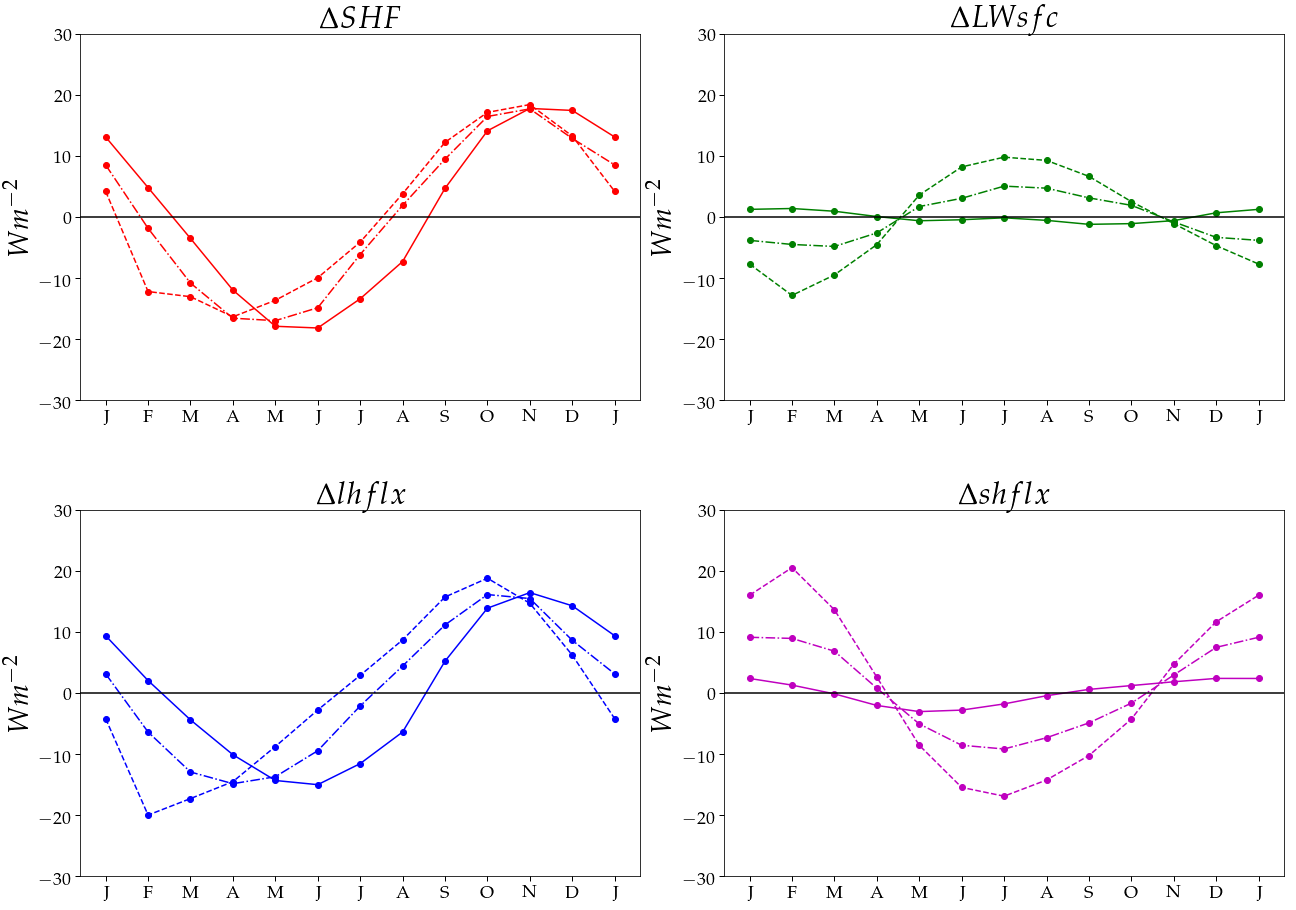

In [165]:
m_to_m=0; l=30
fig=py.figure(figsize=(22, 15))
compare_plot(1,P_SHF,'r',r'$\Delta SHF$',m_to_m,l)
py.ylabel(r"$Wm^{-2}$")
compare_plot(2,P_LWsfc,'g',r'$\Delta LWsfc$',m_to_m,l)
py.ylabel(r"$Wm^{-2}$")
compare_plot(3,P_lhflx,'b',r'$ \Delta lhflx$',m_to_m,l)
py.ylabel(r"$Wm^{-2}$")
compare_plot(4,P_shflx,'m',r'$\Delta shflx$',m_to_m,l)
py.ylabel(r"$Wm^{-2}$")

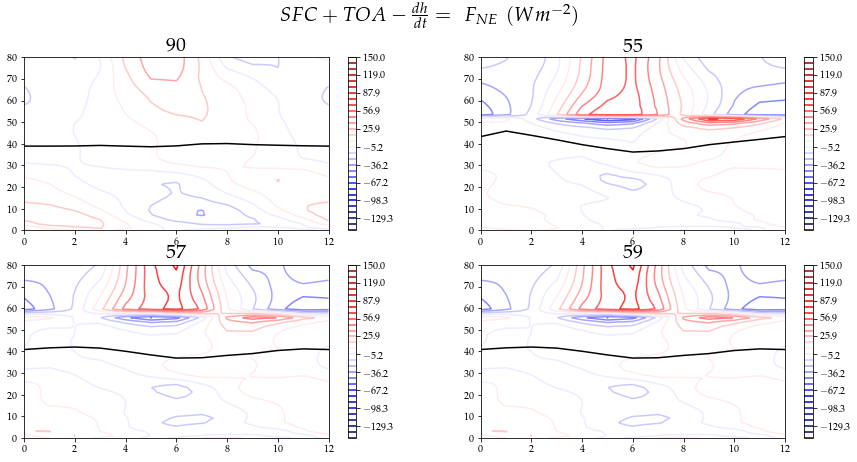

In [166]:
py.figure(figsize=(15,7))
l=150;
v=np.linspace(-1*l,l,30)
for d in range(4):
    py.suptitle(r"$SFC+TOA-\frac{dh}{dt}=\:\:F_{NE}\:\: (Wm^{-2})$",fontsize=20)
    #contf(lat_a,ann_mean(toa_a+sfc_a-dhdt_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contour(range(13),lat_a,(toa_a+sfc_a-dhdt_a)[d,...]-ann_mean(toa_a+sfc_a-dhdt_a)[d,...], v,cmap=cm.seismic); py.colorbar()
    #py.clabel(c,  inline=1,fmt = '%1.1f',colors='k',inline_spacing=5, fontsize=12)  
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
    py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.tight_layout()
#     py.xlim(0,6)

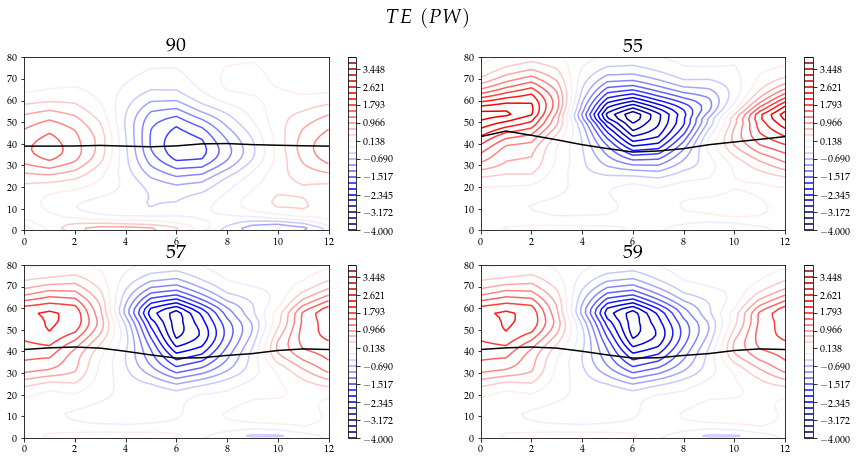

In [167]:
py.figure(figsize=(15,7))
l=4;
v=np.linspace(-1*l,l,30)
for d in range(4):
    py.suptitle(r"$TE\:\: (PW)$",fontsize=20)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contour(range(13),lat_a,(TE_a)[d,...]-ann_mean(TE_a)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)

In [168]:
TE_a   ,SE_a     , MM_a   , NE_a     ,ignore,  lat_a = N_S_avg(TE, SE, MM, NE,NE, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]

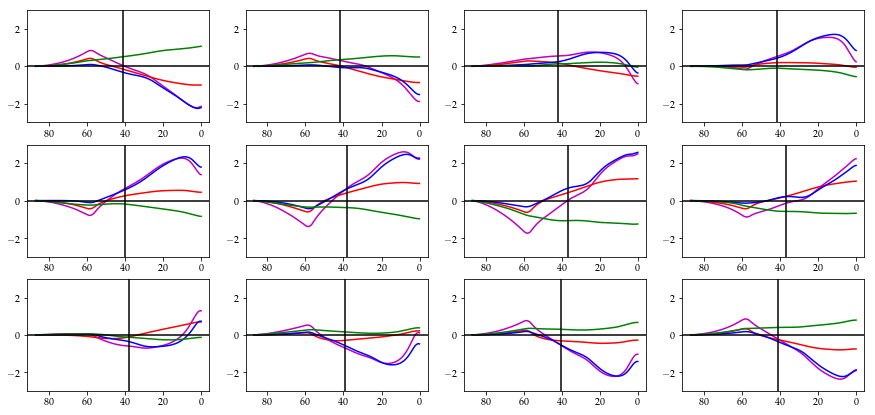

In [169]:
d=2
py.figure(figsize=(15,7))
for m in range(12):
        py.subplot(3,4,m+1)
        y=Ishf_a
        py.plot(lat_a[1:],y[d,:,m]-y.mean(axis=-1)[d,:],'m-')
        y=Ishflx_a
        py.plot(lat_a[1:],y[d,:,m]-y.mean(axis=-1)[d,:],'r-')
        y=Ilhflx_a
        py.plot(lat_a[1:],y[d,:,m]-y.mean(axis=-1)[d,:],'b-')
        y=ILW_sfc_a
        py.plot(lat_a[1:],y[d,:,m]-y.mean(axis=-1)[d,:],'g-')
        py.axvline(zero_div_TE[d,m],color='k')
        py.gca().invert_xaxis()
        py.axhline(0,color='k')
        py.ylim(-3,3)

In [170]:
SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]

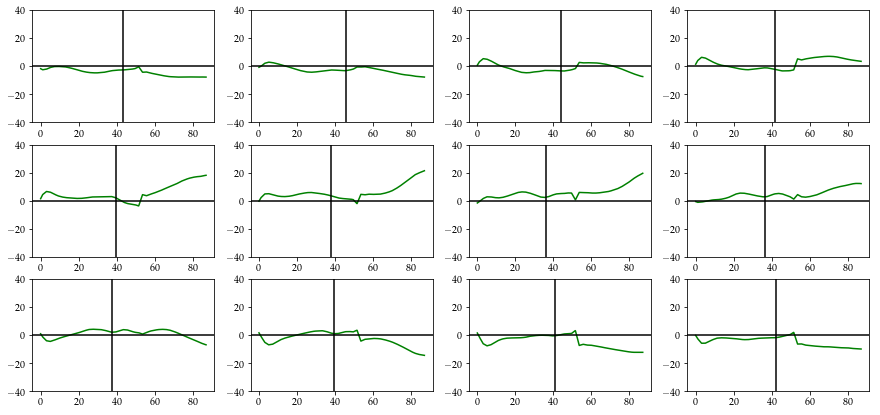

In [173]:
d=1
py.figure(figsize=(15,7))
for m in range(12):
        py.subplot(3,4,m+1)
#         y=SHF_a
#         py.plot(lat_a[:],y[d,:,m]-y.mean(axis=-1)[d,:],'m-')
#         y=shflx_a
#         py.plot(lat_a[:],y[d,:,m]-y.mean(axis=-1)[d,:],'r-')
#         y=lhflx_a
#         py.plot(lat_a[:],y[d,:,m]-y.mean(axis=-1)[d,:],'b-')
        y=LW_sfc_a
        py.plot(lat_a[:],y[d,:,m]- y.mean(axis=-1)[d,:],'g-')
        py.axvline(zero_div_TE[d,m],color='k')
#         py.gca().invert_xaxis()
        py.axhline(0,color='k')
        py.ylim(-40,40)
       

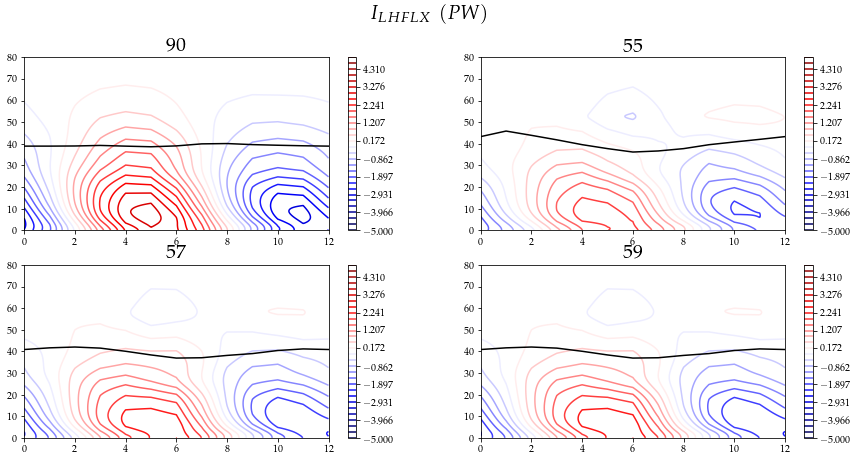

In [174]:
py.figure(figsize=(15,7))
l=5;
title="I_{LHFLX}"
y=Ilhflx_a
v=np.linspace(-1*l,l,30)
for d in range(4):
    py.suptitle(r"$"+title+"\:\: (PW)$",fontsize=20)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contour(range(13),lat_a[:-1],(y)[d,...]-ann_mean(y)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)

In [176]:
TE_a   ,SE_a     , MM_a   , NE_a     ,ignore,  lat_a = N_S_avg(TE, SE, MM, NE,NE, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]


SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]

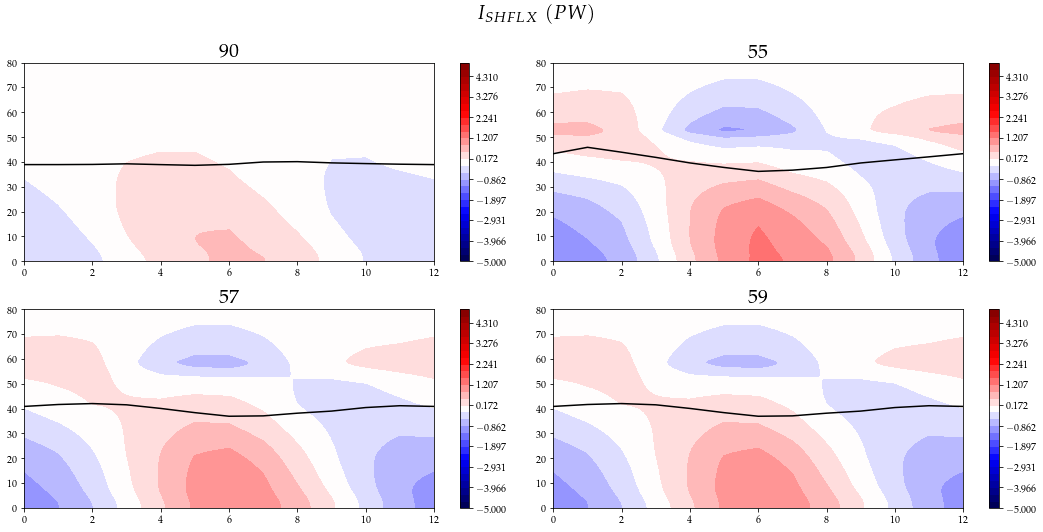

In [177]:
py.figure(figsize=(15,7))
l=5;
title="I_{SHFLX}"
y=Ishflx_a
v=np.linspace(-1*l,l,30)
for d in range(4):
    py.suptitle(r"$"+title+"\:\: (PW)$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contourf(range(13),lat_a[:-1],(y)[d,...]-ann_mean(y)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

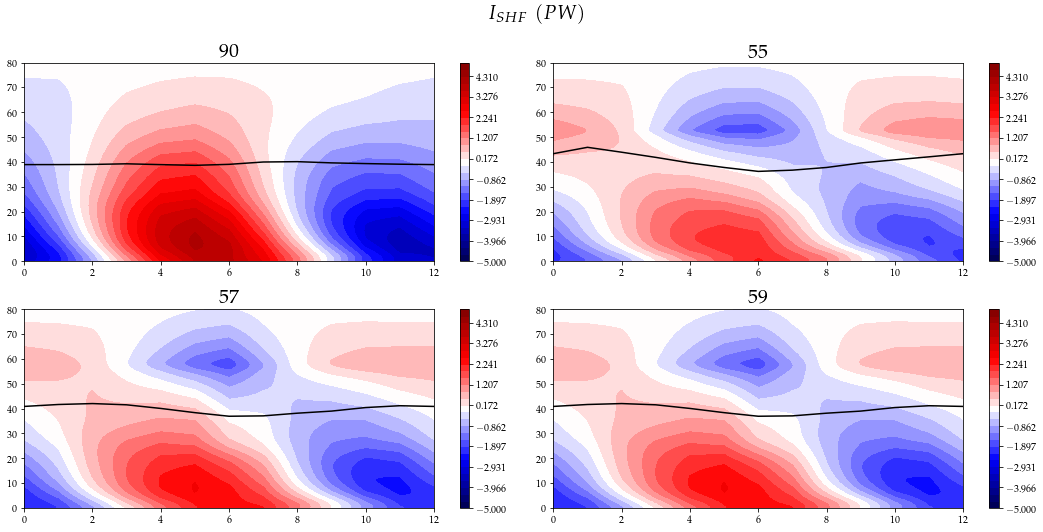

In [184]:
py.figure(figsize=(15,7))
l=5;
title="I_{SHF}"
y=Ishf_a
v=np.linspace(-1*l,l,30)
for d in range(4):
    py.suptitle(r"$"+title+"\:\: (PW)$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contourf(range(13),lat_a[:-1],(y)[d,...]-ann_mean(y)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

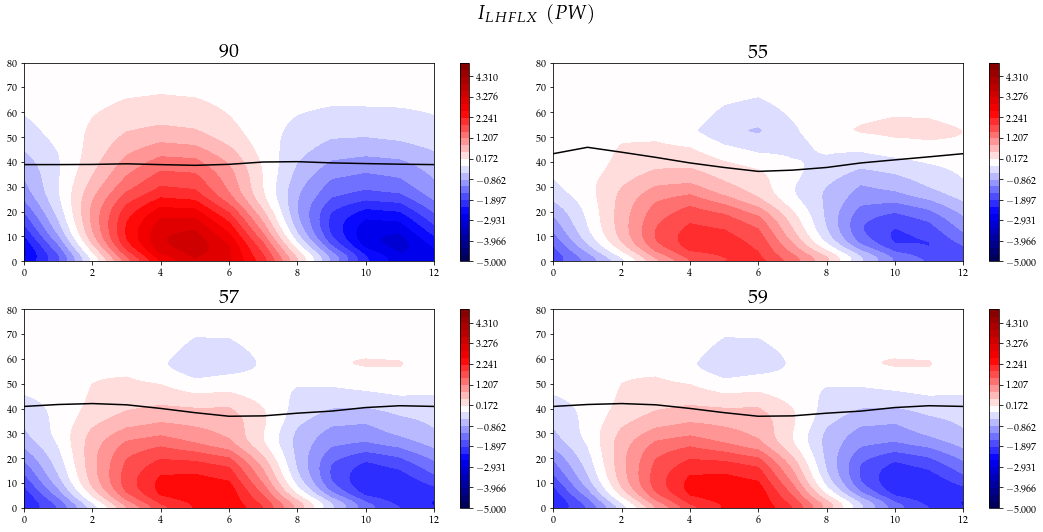

In [179]:
py.figure(figsize=(15,7))
l=5;
title="I_{LHFLX}"
y=Ilhflx_a
v=np.linspace(-1*l,l,30)
for d in range(4):
    py.suptitle(r"$"+title+"\:\: (PW)$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contourf(range(13),lat_a[:-1],(y)[d,...]-ann_mean(y)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

In [116]:
print 1

1


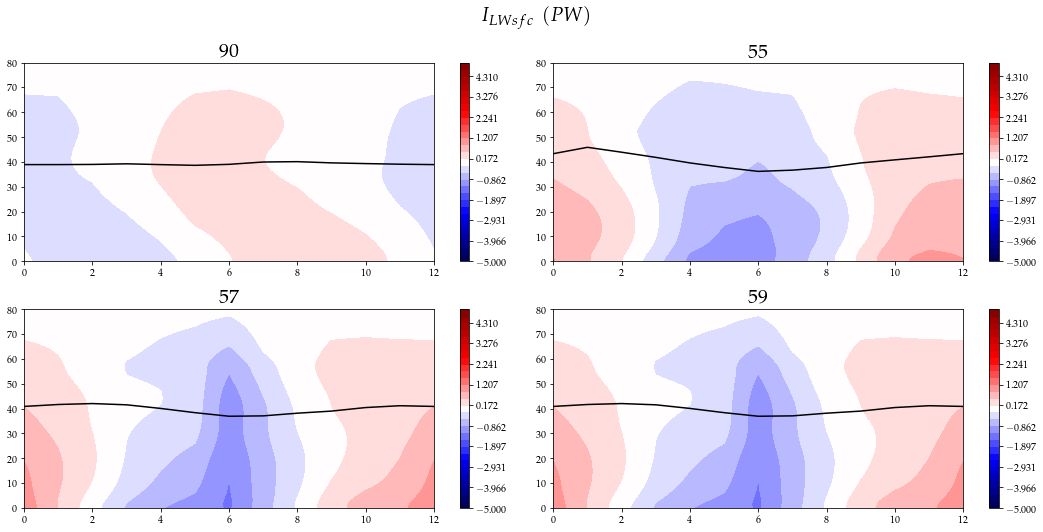

In [180]:
py.figure(figsize=(15,7))
l=5;
title="I_{LWsfc}"
y=ILW_sfc_a
v=np.linspace(-1*l,l,30)
for d in range(4):
    py.suptitle(r"$"+title+"\:\: (PW)$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contourf(range(13),lat_a[:-1],(y)[d,...]-ann_mean(y)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

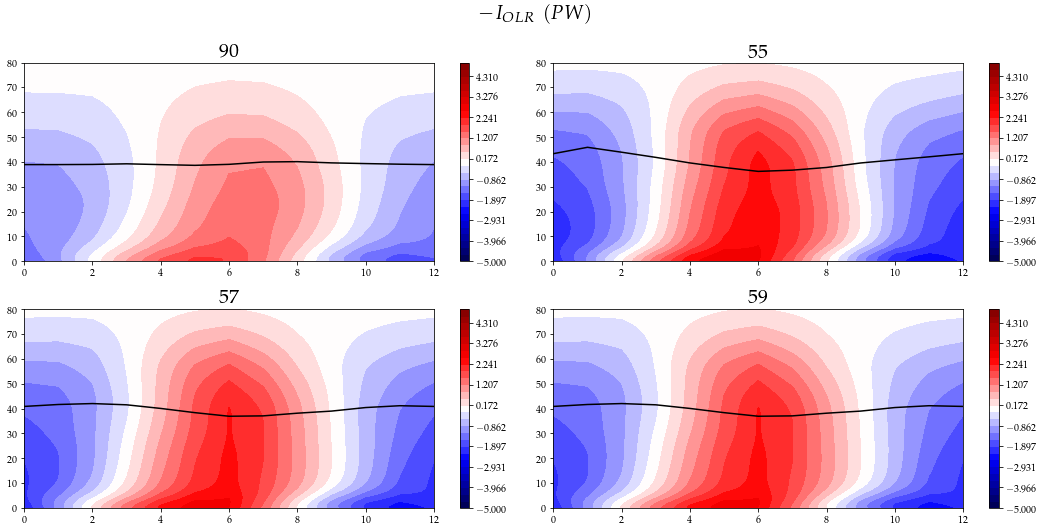

In [181]:
py.figure(figsize=(15,7))
l=5;
title="-I_{OLR}"
y=-Iolr_a
v=np.linspace(-1*l,l,30)
for d in range(4):
    py.suptitle(r"$"+title+"\:\: (PW)$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,d+1)
    py.contourf(range(13),lat_a[:-1],(y)[d,...]-ann_mean(y)[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(str(depths[d]),fontsize=20)
py.tight_layout()

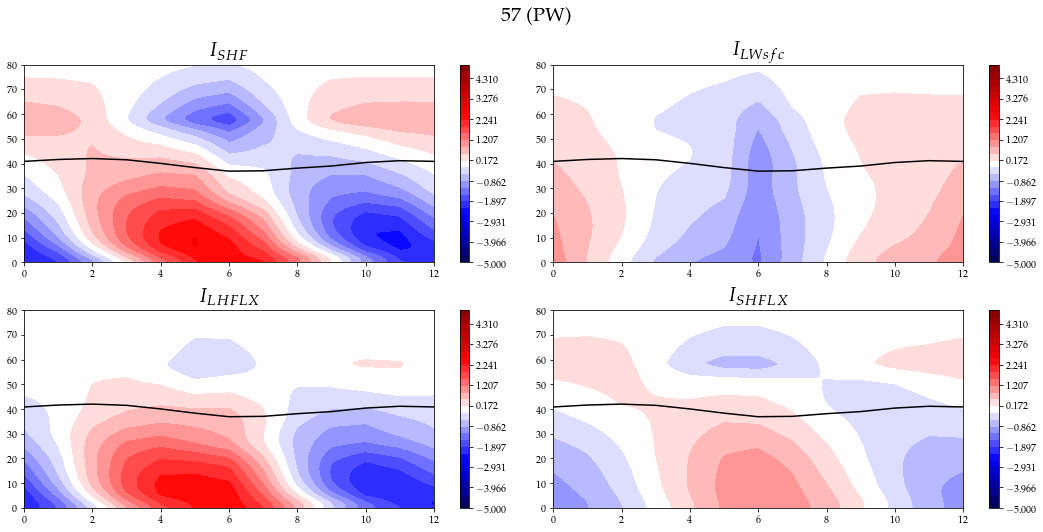

In [182]:
py.figure(figsize=(15,7))
l=5;
d=2
title=str(depths[d])
v=np.linspace(-1*l,l,30)
y=np.array([Ishf_a,ILW_sfc_a,Ilhflx_a,Ishflx_a])
y_titles=np.array(["I_{SHF}","I_{LWsfc}","I_{LHFLX}","I_{SHFLX}"])
for i in range(len(y)):
    py.suptitle(title+" (PW)",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,i+1)
    py.contourf(range(13),lat_a[:-1],(y[i])[d,...]-ann_mean(y[i])[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(r"$"+str(y_titles[i])+"$",fontsize=20)
py.tight_layout()

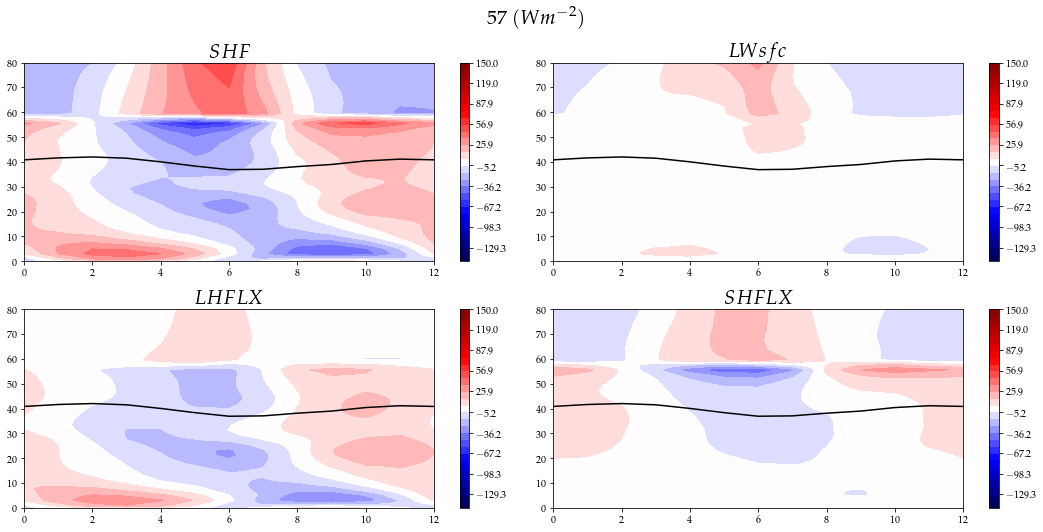

In [183]:
py.figure(figsize=(15,7))
l=150;
title=str(depths[d])
v=np.linspace(-1*l,l,30)
y=np.array([SHF_a,LW_sfc_a,lhflx_a,shflx_a])
y_titles=np.array(["SHF","LWsfc","LHFLX","SHFLX"])
for i in range(len(y)):
    py.suptitle(title+r"  $(Wm^{-2})$",fontsize=20,y=1.05)
    #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
    py.subplot(2,2,i+1)
    py.contourf(range(13),lat_a,(y[i])[d,...]-ann_mean(y[i])[d,...], v,cmap=cm.seismic);
    py.colorbar()
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.title(r"$"+str(y_titles[i])+"$",fontsize=20)
py.tight_layout()

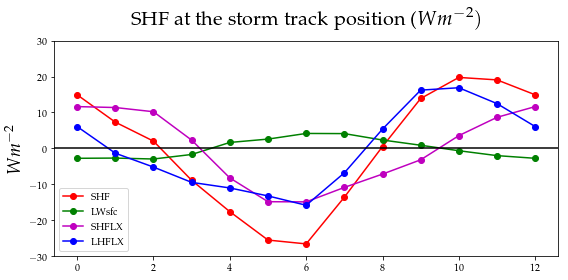

In [98]:
d=0
py.figure(figsize=(8,4))
py.title("SHF at the storm track position ($Wm^{-2})$",fontsize=20,y=1.05)
py.plot(range(13),(P_SHF-ann_mean(P_SHF))[d,:],'ro-',label='SHF')
py.plot(range(13),(P_LWsfc-ann_mean(P_LWsfc))[d,:],'go-',label='LWsfc')
py.plot(range(13),(P_shflx-ann_mean(P_shflx))[d,:],'mo-',label='SHFLX')
py.plot(range(13),(P_lhflx-ann_mean(P_lhflx))[d,:],'bo-',label='LHFLX')
#py.title(str(depths[d]),fontsize=20)
py.legend()
py.ylim(-30,30)
py.axhline(0,color='k')
py.ylabel(r'$Wm^{-2}$',fontsize=18)
py.tight_layout()

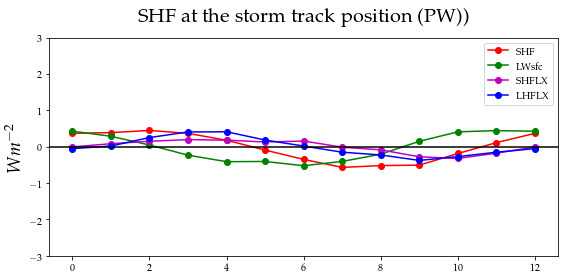

In [99]:
py.figure(figsize=(8,4))
py.title("SHF at the storm track position (PW))",fontsize=20,y=1.05)
py.plot(range(13),(I_SHF-ann_mean(I_SHF))[d,:],'ro-',label='SHF')
py.plot(range(13),(I_LWsfc-ann_mean(I_LWsfc))[d,:],'go-',label='LWsfc')
py.plot(range(13),(I_shflx-ann_mean(I_shflx))[d,:],'mo-',label='SHFLX')
py.plot(range(13),(I_lhflx-ann_mean(I_lhflx))[d,:],'bo-',label='LHFLX')
#py.title(str(depths[d]),fontsize=20)
py.legend()
py.ylim(-3,3)
py.axhline(0,color='k')
py.ylabel(r'$Wm^{-2}$',fontsize=18)
py.tight_layout()

In [123]:
# Check net energy

In [124]:
def contf(l,y, cMAP,d,limit=300):
#     py.subplot(220+d+1)
    toh = rcmap(cm.hot)
    roll=0; min=20; max=60;
#     y=y[:,1:]-y[:,:-1]
#     y=np.append(y[:,-1,None],y,axis=-1)
    #limit=np.max([np.abs(np.max(y)),np.abs(np.min(y))])
    #y=y-np.mean(y,axis=-1)[...,None]
    v=np.arange(-1*limit,limit,10)
#     py.clf()
    c=py.contourf(range(13),l,y,v,cmap=cMAP,extend='both'); 
    #py.colorbar(c); #py.clim(-1*200,200)
    
    py.contour(range(13),l,y,v,colors='k')
    py.clabel(c,  inline=1,fmt = '%i',colors='k',inline_spacing=6, fontsize=18)
    pos=div_TE_a[d,...]
    #py.contour(range(13),lat_a,pos,levels=[0.000],colors='k',linewidth=3.5)
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.tick_params(labelsize=18,size=4,width=2)


/home/pragallva/Project1/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


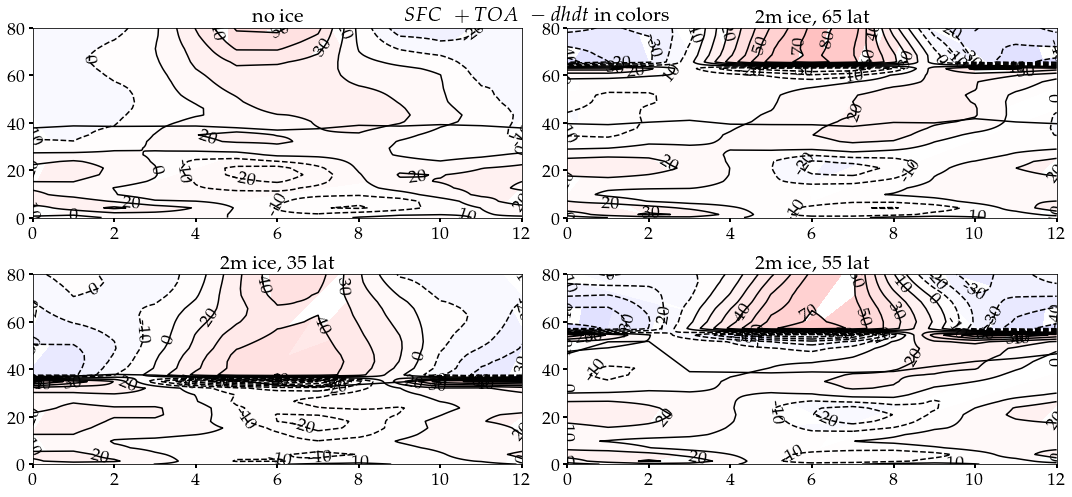

In [125]:
def ann_mean(y):
    return np.dstack([y.mean(axis=-1)]*13)
py.figure(figsize=(15,7))
l=250;
v=np.arange(-1*l,l+10,10)
index=np.squeeze(np.where((lat_a>0) & (lat_a<80)))
for d in range(4):
    py.subplot(2,2,d+1)
    py.suptitle(r"$SFC\:\: + TOA\:\: - dhdt$ in colors",fontsize=20)
    #contf(lat_a,ann_mean(sfc_a)[d,...], cm.seismic,d,l)
    contf(lat_a[index],(toa_a+sfc_a-dhdt_a)[d,index,:]-ann_mean(toa_a+sfc_a-dhdt_a)[d,index,...], cm.seismic,d,l+400)
    #c=py.contour(range(13),lat_a[index],(sfc_a+toa_a-dhdt_a)[d,index,...]-ann_mean(sfc_a+toa_a-dhdt_a)[d,index,...],v,colors='k')
    #py.clabel(c,  inline=1,fmt = '%i',colors='k',inline_spacing=3, fontsize=12)
#     py.ylim(35,55)
    py.title(str(depths[d]),fontsize=20)
    py.xlim(0,12)
py.tight_layout()

In [126]:
def seasonality(d):
    def M(X):
        l=(X-np.nanmean(X[1:]))/np.nanmax(np.abs(X))
        return l

    fig, ax1 = py.subplots()

    ax1.plot(range(13), M(Intensity_te[d,:]), 'bo-')
    ax1.set_xlabel("Months", color='k',fontsize=20)
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel("Intensity (PW)", color='b',fontsize=20)
    ax1.tick_params(labelsize=18)

    ax2 = ax1.twinx()
    ax2.plot(range(13), M(zero_div_TE[d,:]), 'ro-')
    ax2.set_ylabel("Storm track position (deg)", color='r',fontsize=20)
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    py.show()

In [127]:
raw[0].keys()

['Z', 'q', 'U', 'T', 'V', 'MSE', 'latn']

# Look at the temperature

In [128]:
T=[]; Q=[]; U=[]; V=[]; Z=[]
for depth in range(len(DEPTHS)):
    T.append(M(raw[depth]['T']))
    Q.append(M(raw[depth]['q']))
    U.append(M(raw[depth]['U']))
    V.append(M(raw[depth]['V']))
    Z.append(M(raw[depth]['Z']))
    
T=np.array(T); U=np.array(U); V=np.array(V); Z=np.array(Z); Q=np.array(Q)

In [129]:
T.shape

(4, 1741, 40, 12)

In [130]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,...]+flux_flag*np.roll(x[:,l_S,...][:,::-1,...], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[...,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [131]:
T_a   ,U_a, V_a   , Q_a     ,Z_a,  lat_a = N_S_avg(T, U, V, Q, Z, lat,flux_flag=1)

In [132]:
T_a.shape

(4, 871, 40, 13)

### Calculate the temperature gradient

In [130]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div_for_full_field(x):
       N=1
       fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
         for m in range(13):
            for p in range(len(sigma_full)):
              div[d,:,p,m]= smooth( np.gradient((x[d,:,p,m])*(fac),dtheta)/( R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div


div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a

In [131]:
def ann_mean(y):
    return np.squeeze(np.dstack([y[:,:,:,:].mean(axis=-1)]))

In [132]:
ann_mean(T_a).shape

(4, 871, 40)

In [133]:
def M(x):
    x=np.squeeze(np.stack([x.mean(axis=-1)]*13))
    return x.T
        
def contf(y,d,lev):
    
    #py.contourf( range(13),lat_from_mse,A(M(y),n,lev) )
    v=np.linspace(-30,30,30)
    py.contour( range(13),lat_a,(y[d,:,lev,:]-M(y[d,:,lev,:]) ),v,cmap=cm.seismic )

    pos =zero_div_TE[d]   
    py.plot(range(13),pos,'k.-')
#     py.title(str(plev[lev]))
#     py.show()

In [134]:
# ls /project2/tas1/pragallva/Summer_quarter_2018/exp_data/seaice_isca_landice_h0/

In [135]:
file='/project2/tas1/pragallva/Summer_quarter_2018/exp_data/seaice_isca_landice_h0/seaice_isca_landice_h01.nc'
sigma_full=nc.Dataset(file,'r').variables['pfull'][::-1]

Cp= 1004.64 # J/kg/deg
g= 9.8
L=2.500e6 # J/kg


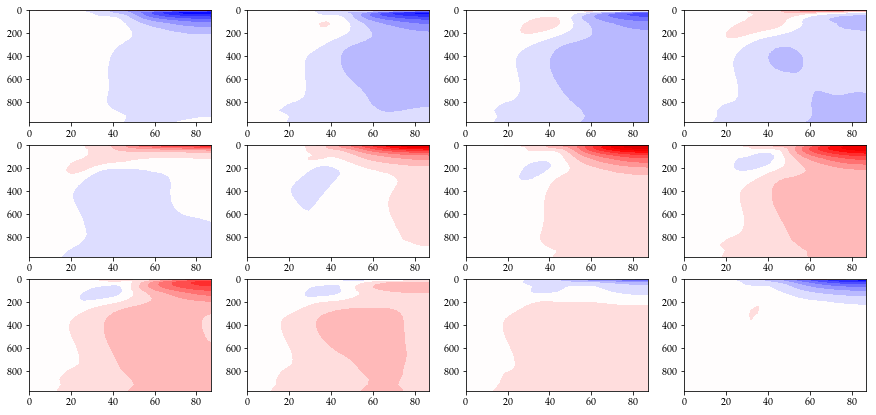

In [136]:
d=0
py.figure(figsize=(15,7))
v=np.linspace(-30,30,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,(T_a[d,:,:,m]-T_a[d,...].mean(axis=-1)).T,v,cmap=cm.seismic)
    py.gca().invert_yaxis()


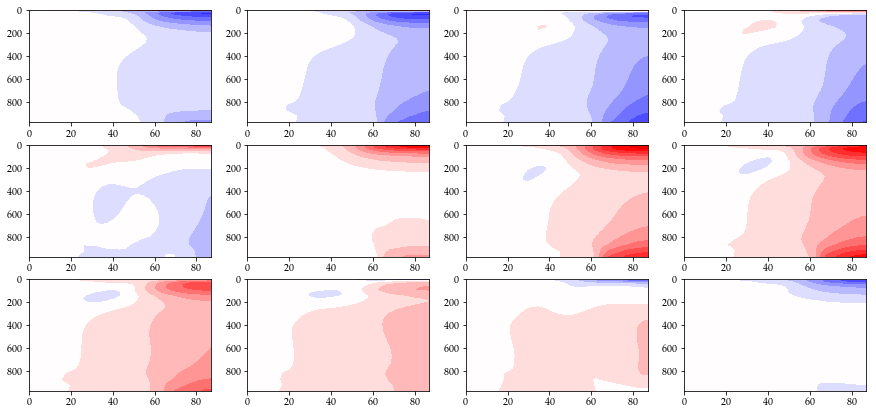

In [137]:
d=1
py.figure(figsize=(15,7))
v=np.linspace(-40,40,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,(T_a[d,:,:,m]-T_a[d,...].mean(axis=-1)).T,v,cmap=cm.seismic)
    py.gca().invert_yaxis()

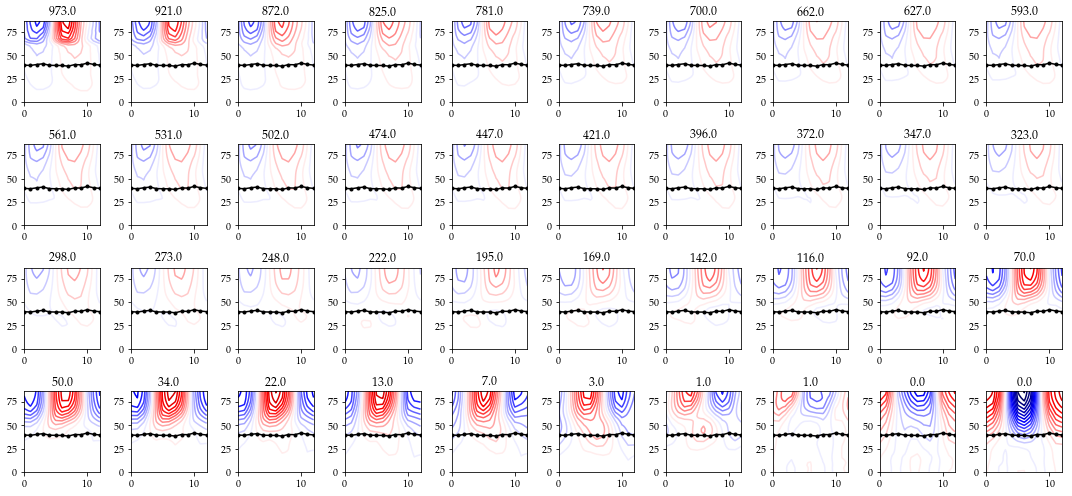

In [138]:
d=1; s=0
py.figure(figsize=(15,7))
for l in range(40):
    py.subplot(4,10,s+1); s=s+1
    contf(T_a,d,l)
    py.title(round(sigma_full[l]))
py.tight_layout()

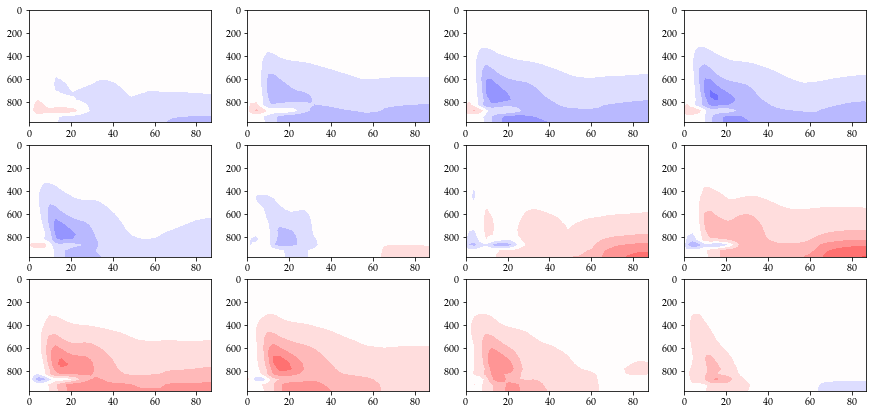

In [139]:
d=1
py.figure(figsize=(15,7))
v=np.linspace(-20e3,20e3,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,L*(Q_a[d,:,:,m]-Q_a[d,...].mean(axis=-1)).T,v,cmap=cm.seismic)
    py.gca().invert_yaxis()
# py.colorbar()

In [140]:
OLR_a.shape

(4, 871, 13)

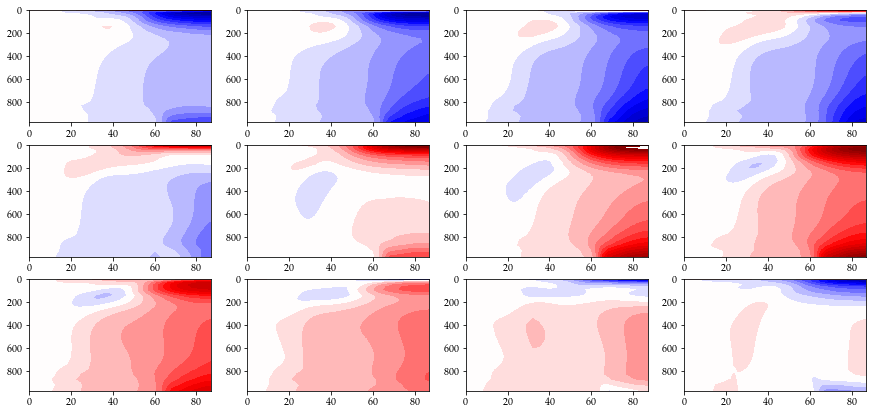

In [141]:
d=1
py.figure(figsize=(15,7))

v=np.linspace(-20e3,20e3,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,Cp*(T_a[d,:,:,m]-T_a[d,...].mean(axis=-1)).T,v,cmap=cm.seismic)
    py.gca().invert_yaxis()

In [142]:
SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]

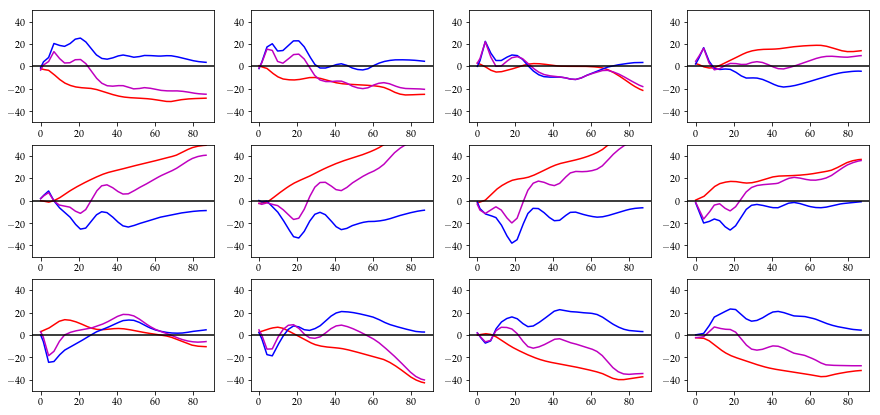

In [143]:
d=0
py.figure(figsize=(15,7))

def field(y,d,m):
    return (y[d,:,m]-y[d,...].mean(axis=-1)).T

v=np.linspace(-20e3,20e3,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.plot(lat_a,field(SW_sfc_a+SW_toa_a+LW_sfc_a-OLR_a,d,m),'r-')
#     py.plot(lat_a,field(SW_sfc_a,d,m),'r--')
    #py.plot(lat_a,field(LW_sfc_a-OLR_a,d,m),'g--')    
#     py.plot(lat_a,field(OLR_a,d,m),'g-')
    
    py.plot(lat_a,field(shflx_a+lhflx_a,d,m),'b-')
    #py.plot(lat_a,field(shflx_a+lhflx_a+LW_sfc_a-OLR_a,d,m),'g--')
    py.plot(lat_a,field(shflx_a+lhflx_a+LW_sfc_a-OLR_a+SW_sfc_a+SW_toa_a,d,m),'m-')
    
#     py.plot(lat_a,field(sfc_a,d,m),'r-')
#     py.plot(lat_a,field(-toa_a,d,m),'r--')
    
#     py.plot(lat_a,field(sfc_a,0,m),'b-')
#     py.plot(lat_a,field(-toa_a,0,m),'b--')
    
#     py.plot(lat_a,field(shflx_a,d,m),'k-')
#     py.plot(lat_a,field(lhflx_a,d,m),'m-')
    py.ylim(-50,50)
    py.axhline(0,c='k')

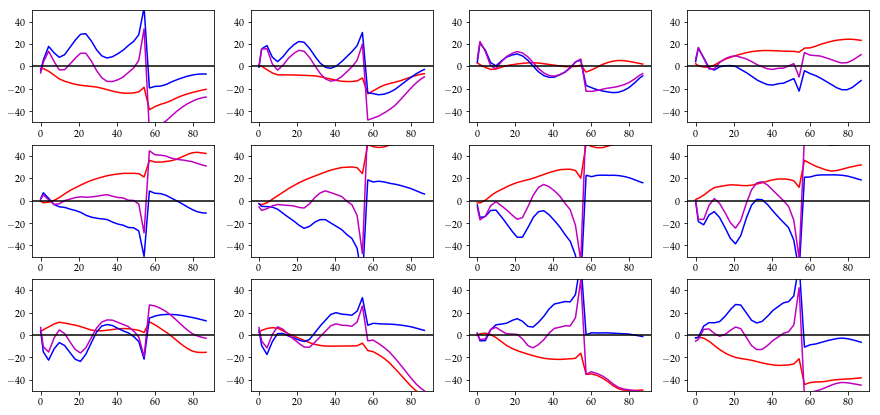

In [144]:
d=3
py.figure(figsize=(15,7))

def field(y,d,m):
    return (y[d,:,m]-y[d,...].mean(axis=-1)).T

v=np.linspace(-20e3,20e3,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.plot(lat_a,field(SW_sfc_a+SW_toa_a+LW_sfc_a-OLR_a,d,m),'r-')
#     py.plot(lat_a,field(SW_sfc_a,d,m),'r--')
    #py.plot(lat_a,field(LW_sfc_a-OLR_a,d,m),'g--')    
#     py.plot(lat_a,field(OLR_a,d,m),'g-')
    
    py.plot(lat_a,field(shflx_a+lhflx_a,d,m),'b-')
    #py.plot(lat_a,field(shflx_a+lhflx_a+LW_sfc_a-OLR_a,d,m),'g--')
    py.plot(lat_a,field(shflx_a+lhflx_a+LW_sfc_a-OLR_a+SW_sfc_a+SW_toa_a,d,m),'m-')
    
#     py.plot(lat_a,field(sfc_a,d,m),'r-')
#     py.plot(lat_a,field(-toa_a,d,m),'r--')
    
#     py.plot(lat_a,field(sfc_a,0,m),'b-')
#     py.plot(lat_a,field(-toa_a,0,m),'b--')
    
#     py.plot(lat_a,field(shflx_a,d,m),'k-')
#     py.plot(lat_a,field(lhflx_a,d,m),'m-')
    py.ylim(-50,50)
    py.axhline(0,c='k')

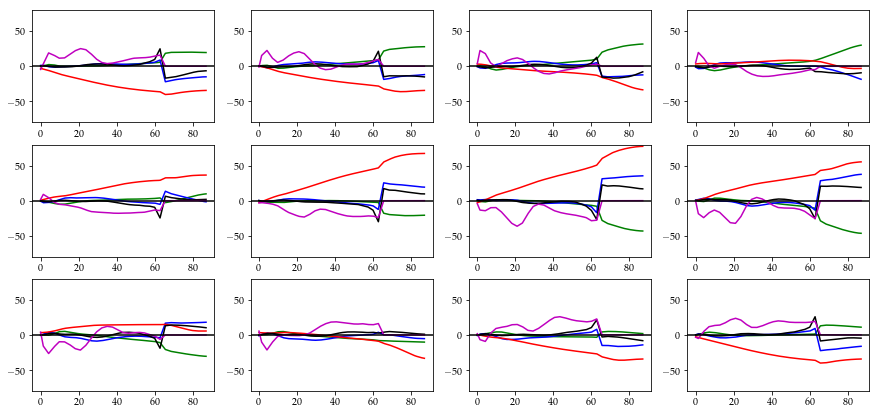

In [145]:
d=1
py.figure(figsize=(15,7))

def field(y,d,m):
    return (y[d,:,m]-y[d,...].mean(axis=-1)).T

v=np.linspace(-20e3,20e3,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.plot(lat_a,field(-OLR_a,d,m),'g-')
    py.plot(lat_a,field(LW_sfc_a,d,m),'b-')
    py.plot(lat_a,field(SWABS_a,d,m),'r-')
    py.plot(lat_a,field(shflx_a,d,m),'k-')
    py.plot(lat_a,field(lhflx_a,d,m),'m-')
    py.ylim(-80,80)
    py.axhline(0,c='k')

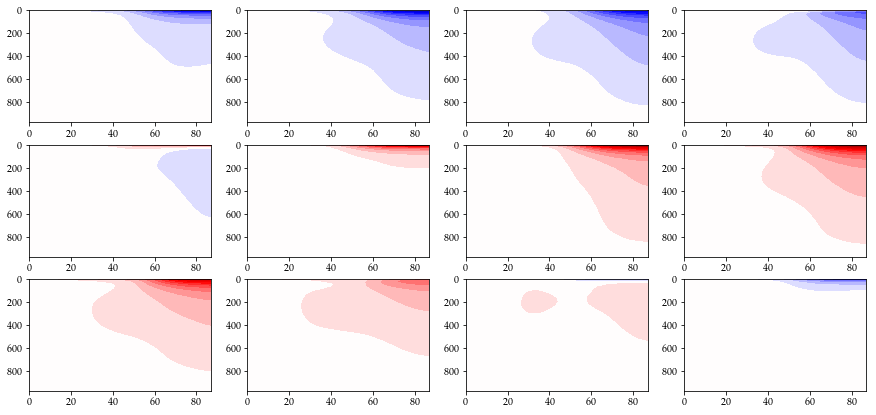

In [146]:
d=1
py.figure(figsize=(15,7))
v=np.linspace(-20e3,20e3,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,g*(Z_a[d,:,:,m]-Z_a[d,...].mean(axis=-1)).T,v,cmap=cm.seismic)
    py.gca().invert_yaxis()
# py.colorbar()

# Check EKE

In [147]:
ls /project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca10m

coord_dic.hkl             EKE_interp.hkl             raw_data_dict.hkl
div_flux_dict.hkl         flux_interp_dict.hkl       temp_dic.hkl
div_vert_interp_dict.hkl  flux_vert_interp_dict.hkl  tsurf_interp.hkl


In [148]:
EKE=load("/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/EKE_interp.hkl")

In [149]:
EKE.keys()
EKE_vert=EKE['EKE_vert']

In [150]:
eke=EKE['EKE']

In [151]:
plevs=EKE['sigma_full']

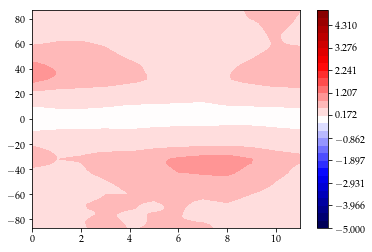

In [152]:
v=np.linspace(-5,5,30)
py.contourf(range(12),EKE['latn'],EKE_vert/10**6,v,cmap=cm.seismic);py.colorbar()

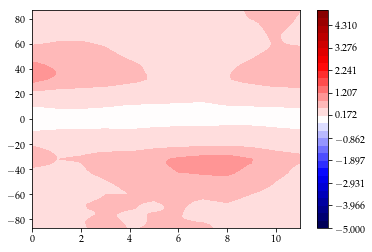

In [153]:
v=np.linspace(-5,5,30)
py.contourf(range(12),EKE['latn'],EKE_vert/10**6,v,cmap=cm.seismic);py.colorbar()

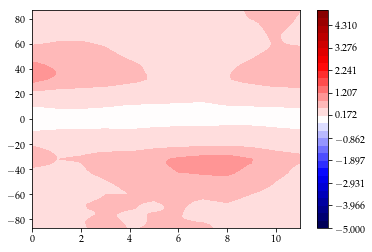

In [154]:
# p=p+1
v=np.linspace(-5,5,30)
py.contourf(range(12),EKE['latn'],EKE_vert/10**6,v,cmap=cm.seismic);py.colorbar()
# py.title(str(plevs[p]))

In [155]:
p=p-1
v=np.linspace(-500,500,30)
py.contourf(range(12),EKE['latn'],eke[:,p,:],v,cmap=cm.seismic);py.colorbar()
py.title(str(plevs[p]))

NameError: name 'p' is not defined

# End of the code